In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 359.2 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [3]:
import datasets
from datasets import Dataset, DatasetDict
# from transformers import AutoTokenizer
import pandas as pd
import psutil
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset, concatenate_datasets
import json
from sklearn.preprocessing import StandardScaler
import json
from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
ds_features = load_dataset("marco-molinari/company_reports_with_features")
df_features = ds_features['train'].to_pandas()
df = df_features
df = df.dropna(subset=['features'])
df[df["__index_level_0__"] == 41183]
df_features=0
ds_features=0
df['features'] = df['features'].apply(lambda x: x[0])
df

README.md:   0%|          | 0.00/356 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/59 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/59 [00:00<?, ?it/s]

train-00000-of-00059.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

train-00001-of-00059.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

train-00002-of-00059.parquet:   0%|          | 0.00/220M [00:00<?, ?B/s]

train-00003-of-00059.parquet:   0%|          | 0.00/220M [00:00<?, ?B/s]

train-00004-of-00059.parquet:   0%|          | 0.00/223M [00:00<?, ?B/s]

train-00005-of-00059.parquet:   0%|          | 0.00/224M [00:00<?, ?B/s]

train-00006-of-00059.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

train-00007-of-00059.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00008-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00009-of-00059.parquet:   0%|          | 0.00/239M [00:00<?, ?B/s]

train-00010-of-00059.parquet:   0%|          | 0.00/221M [00:00<?, ?B/s]

train-00011-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00012-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00013-of-00059.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00014-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00015-of-00059.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00016-of-00059.parquet:   0%|          | 0.00/232M [00:00<?, ?B/s]

train-00017-of-00059.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

train-00018-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00019-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00020-of-00059.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00021-of-00059.parquet:   0%|          | 0.00/235M [00:00<?, ?B/s]

train-00022-of-00059.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00023-of-00059.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

train-00024-of-00059.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

train-00025-of-00059.parquet:   0%|          | 0.00/238M [00:00<?, ?B/s]

train-00026-of-00059.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00027-of-00059.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00028-of-00059.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

train-00029-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00030-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00031-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00032-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00033-of-00059.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00034-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00035-of-00059.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00036-of-00059.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

train-00037-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00038-of-00059.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00039-of-00059.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00040-of-00059.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00041-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00042-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00043-of-00059.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00044-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00045-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00046-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00047-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00048-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00049-of-00059.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

train-00050-of-00059.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00051-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00052-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00053-of-00059.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00054-of-00059.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

train-00055-of-00059.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00056-of-00059.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

train-00057-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00058-of-00059.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28004 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/58 [00:00<?, ?it/s]

,__index_level_0__,features
0,0,"[6.589911460876465, 1.9236905574798584, 0.7851..."
1,3,"[9.283761024475098, 14.538015365600586, 1.2127..."
2,5,"[53.15042495727539, 14.466418266296387, 0.0, 0..."
3,6,"[5.167116165161133, 5.92924165725708, 0.0, 2.7..."
4,7,"[64.84146881103516, 16.842525482177734, 2.4785..."
...,...,...
27999,61772,"[0.0, 19.52836799621582, 0.0, 0.0, 0.0, 2.2094..."
28000,61782,"[0.8814184665679932, 6.3967976570129395, 0.0, ..."
28001,61785,"[40.72739791870117, 11.249809265136719, 0.0, 0..."
28002,61786,"[22.350818634033203, 7.032350063323975, 0.0, 0..."


In [ ]:
import psutil
import os
process = psutil.Process(os.getpid())
print(f"Memory usage before: {process.memory_info().rss / 1024 ** 2:.2f} MB")

Memory usage before: 28439.29 MB


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd

# Enable tqdm for pandas
tqdm.pandas()

# Convert the list of features to a NumPy array (avoid .to_list() overhead)
features_matrix = np.vstack(df['features'])

# Apply StandardScaler to the entire dataset (consistent normalization)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_matrix)

# Assign back efficiently with tqdm (shows progress)
df['normalized_features'] = tqdm(normalized_features.tolist(), desc="Applying StandardScaler")

Applying StandardScaler: 100%|██████████| 27993/27993 [00:00<00:00, 5522631.79it/s]


In [ ]:
df["features"] = df["features"].apply(lambda x: np.round(np.array(x, dtype=np.float32), decimals=4))

,__index_level_0__,features
0,0,"[-0.5995, -0.8102, 0.4361, -0.2729, -0.0946, -..."
1,3,"[-0.5553, -0.3917, 0.8542, -0.2729, -0.1782, -..."
2,5,"[0.1658, -0.3941, -0.3315, 0.1498, -0.1782, 0...."
3,6,"[-0.6229, -0.6773, -0.3315, 1.2973, -0.1782, -..."
4,7,"[0.358, -0.3153, 2.0919, -0.2729, 0.2195, -0.6..."
...,...,...
27999,61772,"[-0.7079, -0.2262, -0.3315, -0.2729, -0.1782, ..."
28000,61782,"[-0.6934, -0.6618, -0.3315, -0.2729, -0.1782, ..."
28001,61785,"[-0.0384, -0.5008, -0.3315, -0.2729, -0.0172, ..."
28002,61786,"[-0.3405, -0.6407, -0.3315, -0.2729, -0.1782, ..."


In [ ]:
import pickle
with open("global_scaler.pkl", "rb") as f:
    global_scaler = pickle.load(f)

all_features = np.vstack([np.array(row) for row in df['features']])
f_transformed = global_scaler.transform(all_features)
df["features"] = list(f_transformed)
df

,__index_level_0__,features
0,0,"[-0.5995439862792569, -0.8102077274072256, 0.4..."
1,3,"[-0.5552626242026518, -0.3917139305002379, 0.8..."
2,5,"[0.16581536580440287, -0.3940892412989619, -0...."
3,6,"[-0.622931822965392, -0.6773192602122491, -0.3..."
4,7,"[0.35799214988964, -0.31525932802511625, 2.091..."
...,...,...
27999,61772,"[-0.7078686156108295, -0.22615361299941744, -0..."
28000,61782,"[-0.6933799036996253, -0.6618075868899872, -0...."
28001,61785,"[-0.03839372063310651, -0.5008037055716674, -0..."
28002,61786,"[-0.3404669960044202, -0.6407224520376444, -0...."


In [ ]:
type(df['features'].iloc[0][0])

numpy.float32

In [ ]:
process = psutil.Process(os.getpid())
print(f"Memory usage before: {process.memory_info().rss / 1024 ** 2:.2f} MB")

Memory usage before: 42419.53 MB


# 1 PCA

In [ ]:
### from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np

def apply_global_pca(X, target_length):
    """
    Perform PCA on the 'features' column globally (across all years) to ensure consistent eigenvectors,
    then replace the 'features' column with PCA-transformed features for each year.
    """
    # Extract all features globally
    all_features = np.vstack([np.array(row) for row in X['features']])

    # Standardize features globally
    scaler = StandardScaler()
    all_features_scaled = scaler.fit_transform(all_features)

    # Fit PCA globally
    pca = PCA(n_components=target_length)
    all_features_pca = pca.fit_transform(all_features_scaled)

    # Transform features year by year using the global PCA
    years = X['year'].unique()
    pca_features = {}

    for year in tqdm(sorted(years), desc="Processing Years"):
        year_data = X[X['year'] == year]
        feature_matrix = np.vstack([np.array(row) for row in year_data['features']])

        # Standardize using the global scaler
        feature_matrix_scaled = scaler.transform(feature_matrix)

        # Transform using the global PCA
        feature_matrix_pca = pca.transform(feature_matrix_scaled)

        # Store PCA-transformed features by index
        indices = year_data.index
        for idx, transformed_features in zip(indices, feature_matrix_pca):
            pca_features[idx] = transformed_features

    # Replace the 'features' column with PCA-transformed features
    X['features'] = X.index.map(pca_features)

    return X, pca

# Example usage
X_pca_transformed, global_pca = apply_global_pca(df, target_length=4000)

In [ ]:
# We've saved the above output as a .pkl file, we load the PCA model
global_pca = joblib.load("./global_pca_model(4000).pkl")
global_pca

PCA(n_components=4000)

In [ ]:
# Variance kept:
original_variance = np.sum(global_pca.explained_variance_ratio_)
original_variance

0.89917785

# 2 Cos Sim

In [ ]:
df = df.rename({"__index_level_0__": "Company_tag"}, axis=1)
df

,Company_tag,features
0,0,"[-0.5995439862792569, -0.8102077274072256, 0.4..."
1,3,"[-0.5552626242026518, -0.3917139305002379, 0.8..."
2,5,"[0.16581536580440287, -0.3940892412989619, -0...."
3,6,"[-0.622931822965392, -0.6773192602122491, -0.3..."
4,7,"[0.35799214988964, -0.31525932802511625, 2.091..."
...,...,...
27999,61772,"[-0.7078686156108295, -0.22615361299941744, -0..."
28000,61782,"[-0.6933799036996253, -0.6618075868899872, -0...."
28001,61785,"[-0.03839372063310651, -0.5008037055716674, -0..."
28002,61786,"[-0.3404669960044202, -0.6407224520376444, -0...."


In [ ]:
# pairs_df is computed by cycling through each company and computing its monthly logged correlations via yfinance
pairs_df = pd.read_parquet("sum_abs_pairs(with_corr)(4000).parquet")
pairs_df

,Company1,Company2,year,correlation,sum_abs_diff,sum_abs_diff_scaled_01
0,1171,1172,1996,0.179548,19924.898438,0.387681
1,1171,1176,1996,-0.021768,17960.765625,0.349465
2,1171,1177,1996,-0.192358,16729.808594,0.325514
3,1171,1180,1996,0.260013,16845.119141,0.327758
4,1171,1183,1996,0.467310,16260.281250,0.316378
...,...,...,...,...,...,...
15002319,21773,21781,2020,0.794267,11043.988281,0.214884
15002320,21773,21782,2020,0.718139,14834.203125,0.288631
15002321,21775,21781,2020,0.173407,16178.605469,0.314789
15002322,21775,21782,2020,0.316428,19111.707031,0.371859


In [ ]:
pip install tensorflow

In [ ]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

# --- Step 1: Convert df into a TensorFlow-compatible lookup dictionary ---
# Convert feature lists to TensorFlow tensors
features_dict = {str(row['Company_tag']).encode('utf-8'): tf.convert_to_tensor(row['features'], dtype=tf.float32)
                 for _, row in df.iterrows()}


In [ ]:

# --- Step 2: Define a TPU-Optimized Cosine Similarity Function ---
@tf.function  # Optimizes execution on TPU
def cosine_similarity_tpu(x, y):
    norm_x = tf.norm(x)
    norm_y = tf.norm(y)
    return tf.tensordot(x, y, axes=1) / (norm_x * norm_y)

# --- Step 3: Convert pairs_df into a TensorFlow dataset for TPU parallelization ---
pairs_ds = tf.data.Dataset.from_tensor_slices((pairs_df['Company1'].astype(str).values,
                                               pairs_df['Company2'].astype(str).values))

# --- Step 4: Compute Cosine Similarity in Parallel using TPU ---
cosine_similarities = []

for comp1, comp2 in tqdm(pairs_ds.as_numpy_iterator(), total=len(pairs_df), desc="Computing Cosine Similarities"):
    vec1 = features_dict.get(comp1)
    vec2 = features_dict.get(comp2)

    if vec1 is None or vec2 is None:
        cosine_similarities.append(np.nan)
    else:
        cosine_similarities.append(cosine_similarity_tpu(vec1, vec2).numpy())  # Convert back to NumPy

# Add new column to pairs_df
pairs_df['cosine_similarity'] = cosine_similarities
pairs_df

In [ ]:
# from datasets import Dataset
# import pandas as pd

# hf_dataset = Dataset.from_pandas(pairs_df)

# from huggingface_hub import login
# login(token="")
# hf_dataset.push_to_hub("v1ctor10/cos_sim_4000pca_exp")

# 3 Clustering

In [4]:
import datasets
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer
import pandas as pd
import psutil
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset, concatenate_datasets
import json
from sklearn.preprocessing import StandardScaler
import json
from scipy.stats import pearsonr

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [5]:
import psutil
import os
process = psutil.Process(os.getpid())
print(f"Memory usage before: {process.memory_info().rss / 1024 ** 2:.2f} MB")

Memory usage before: 698.69 MB


In [6]:
ds_compinfo = load_dataset("Mateusz1017/annual_reports_tokenized_llama3_logged_returns_no_null_returns_and_incomplete_descriptions_24k")
df_compinfo = ds_compinfo['train'].to_pandas()
df_compinfo = df_compinfo[["cik", "year", "sic_code", "ticker", "__index_level_0__"]]
df_compinfo = df_compinfo.dropna(subset=['sic_code'])
print(f"Number of rows after dropping missing sic_code: {len(df_compinfo)}")
# Define a function to classify SIC codes into industries based on the first two digits
def classify_sic(sic_code):
    # Extract the first two digits of the SIC code
    first_two_digits = int(str(sic_code)[:2])

    # Map to industry categories
    if 1 <= first_two_digits <= 9:
        return 'Agriculture, Forestry, And Fishing'
    elif 10 <= first_two_digits <= 14:
        return 'Mining'
    elif 15 <= first_two_digits <= 17:
        return 'Construction'
    elif 20 <= first_two_digits <= 39:
        return 'Manufacturing'
    elif 40 <= first_two_digits <= 49:
        return 'Transportation, Communications, Electric, Gas, And Sanitary Services'
    elif 50 <= first_two_digits <= 51:
        return 'Wholesale Trade'
    elif 52 <= first_two_digits <= 59:
        return 'Retail Trade'
    elif 60 <= first_two_digits <= 67:
        return 'Finance, Insurance, And Real Estate'
    elif 70 <= first_two_digits <= 89:
        return 'Services'
    elif 90 <= first_two_digits <= 99:
        return 'Public Administration'
    else:
        return 'Unknown'
ds_compinfo = 0
# Apply the classification to the SIC codes in the dataset
df_compinfo['industry_classification'] = df_compinfo['sic_code'].apply(classify_sic)
process = psutil.Process(os.getpid())
print(f"Memory usage before: {process.memory_info().rss / 1024 ** 2:.2f} MB")

README.md:   0%|          | 0.00/697 [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/140M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/154M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/158M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/155M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/159M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/27888 [00:00<?, ? examples/s]

Number of rows after dropping missing sic_code: 27722
Memory usage before: 4318.84 MB


In [7]:
df_compinfo

,cik,year,sic_code,ticker,__index_level_0__,industry_classification
0,75252,1993,5047,[OMI],0,Wholesale Trade
1,40533,1993,3730,[GD],3,Manufacturing
2,91576,1993,6021,"[KEY, KEY-PJ, KEY-PK, KEY-PI, KEY-PL]",5,"Finance, Insurance, And Real Estate"
3,7536,1993,5065,[ARW],6,Wholesale Trade
4,10456,1993,3841,[BAX],7,Manufacturing
...,...,...,...,...,...,...
27883,74046,2019,3990,[ODC],61772,Manufacturing
27884,1750,2019,3720,[AIR],61782,Manufacturing
27885,80420,2019,3613,[POWL],61785,Manufacturing
27886,934796,2019,7310,[NWCN],61786,Services


In [8]:
pairs_ds = load_dataset("v1ctor10/cos_sim_4000pca_exp")
pairs_df = pairs_ds['train'].to_pandas()
pairs_df

README.md:   0%|          | 0.00/592 [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/320M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/325M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15002324 [00:00<?, ? examples/s]

,Company1,Company2,year,correlation,sum_abs_diff,sum_abs_diff_scaled_01,cosine_similarity,cosine_similarity_scaled
0,1171,1172,1996,0.179548,19924.898438,0.387681,0.019105,-0.034783
1,1171,1176,1996,-0.021768,17960.765625,0.349465,-0.012920,-0.227196
2,1171,1177,1996,-0.192358,16729.808594,0.325514,-0.045662,-0.423916
3,1171,1180,1996,0.260013,16845.119141,0.327758,-0.027646,-0.315671
4,1171,1183,1996,0.467310,16260.281250,0.316378,-0.062650,-0.525977
...,...,...,...,...,...,...,...,...
15002319,21773,21781,2020,0.794267,11043.988281,0.214884,0.074697,0.299221
15002320,21773,21782,2020,0.718139,14834.203125,0.288631,-0.000808,-0.154422
15002321,21775,21781,2020,0.173407,16178.605469,0.314789,-0.103223,-0.769746
15002322,21775,21782,2020,0.316428,19111.707031,0.371859,0.057970,0.198721


In [9]:
pairs_df = pairs_df.dropna(subset=['correlation']).reset_index(drop=True)
pairs_df["year"] = pairs_df["year"].astype(int)
pairs_df

,Company1,Company2,year,correlation,sum_abs_diff,sum_abs_diff_scaled_01,cosine_similarity,cosine_similarity_scaled
0,1171,1172,1996,0.179548,19924.898438,0.387681,0.019105,-0.034783
1,1171,1176,1996,-0.021768,17960.765625,0.349465,-0.012920,-0.227196
2,1171,1177,1996,-0.192358,16729.808594,0.325514,-0.045662,-0.423916
3,1171,1180,1996,0.260013,16845.119141,0.327758,-0.027646,-0.315671
4,1171,1183,1996,0.467310,16260.281250,0.316378,-0.062650,-0.525977
...,...,...,...,...,...,...,...,...
14920744,21773,21781,2020,0.794267,11043.988281,0.214884,0.074697,0.299221
14920745,21773,21782,2020,0.718139,14834.203125,0.288631,-0.000808,-0.154422
14920746,21775,21781,2020,0.173407,16178.605469,0.314789,-0.103223,-0.769746
14920747,21775,21782,2020,0.316428,19111.707031,0.371859,0.057970,0.198721


## 3.1 Preparing our data before building clusters

In [10]:
def calculate_avg_correlation(TO_ANALYSE_DF, cluster_df, cluster_type):
    avg_correlations = []

    for _, row in tqdm(cluster_df.iterrows(), desc=f"Calculating Stats for {cluster_type}", total=len(cluster_df)):
        year = row['year']
        clusters = row['clusters']
        year_data = TO_ANALYSE_DF[TO_ANALYSE_DF['year'] == year]
        cluster_stats = []
        for cluster_id, companies in clusters.items():
            if len(companies) <= 1:  # Skip clusters with only 1 company
                continue

            # Get all pairs of companies within the cluster
            cluster_pairs = year_data[
                (year_data['Company1'].isin(companies) & year_data['Company2'].isin(companies))
            ]
            # Calculate statistics for the cluster
            if not cluster_pairs.empty:
                try:
                    correlations = cluster_pairs['correlation']
                except KeyError:
                    # Handle alternative column name if 'correlation' doesn't exist
                    correlations = cluster_pairs['ActualCorrelation']
                cluster_stats.append(correlations.mean())

        # Aggregate statistics across clusters for the year
        if cluster_stats:
            avg_correlations.append({
                'year': year,
                f'{cluster_type}AvgCorrelation': sum(cluster_stats) / len(cluster_stats)
            })
        else:
            avg_correlations.append({
                'year': year,
                f'{cluster_type}AvgCorrelation': np.nan
            })

    return pd.DataFrame(avg_correlations)


def get_joined(TOJOINDF):
    # Initialize the result list
    year_joined_df_data = []

    # Iterate over each year in the DataFrames
    for index, row in year_cluster_df.iterrows():
        year = row['year']
        clusters1 = row['clusters']  # Clusters from year_cluster_df

        # Get the corresponding clusters for the same year from year_SIC_cluster_df
        sic_row = TOJOINDF[TOJOINDF['year'] == year]
        if sic_row.empty:
            continue  # Skip if no matching year in SIC clusters
        clusters2 = sic_row.iloc[0]['clusters']  # Extract the SIC clusters dictionary

        # Build a mapping from company IDs to SIC cluster IDs
        company_sic_cluster_dict = {}
        for sic_cluster_id, sic_companies in clusters2.items():
            for company_id in sic_companies:
                company_sic_cluster_dict[company_id] = sic_cluster_id

        # For each cluster in clusters1, check if all companies have the same SIC cluster ID
        joined_clusters = {}
        for cluster_id, companies in clusters1.items():
            sic_cluster_ids = set()
            for company_id in companies:
                if company_id in company_sic_cluster_dict:
                    sic_cluster_ids.add(company_sic_cluster_dict[company_id])
                else:
                    # Company not found in SIC clusters
                    sic_cluster_ids.add(None)
            # If all companies have the same SIC cluster ID (and not None)
            if len(sic_cluster_ids) == 1 and None not in sic_cluster_ids:
                # Include this cluster in joined_clusters
                joined_clusters[cluster_id] = companies

        # Only include clusters with non-empty joined_clusters
        if joined_clusters:
            year_joined_df_data.append({'year': year, 'clusters': joined_clusters})

    # Convert the result list to a DataFrame
    year_joined_df = pd.DataFrame(year_joined_df_data)
    return year_joined_df

def create_cluster_dfs(df_compinfo, year_cluster_df):
    """
    Create SIC and Industry cluster DataFrames for each year.
    """
    year_SIC_cluster_df = []
    year_Industry_cluster_df = []

    for year in tqdm(sorted(df_compinfo['year'].unique()), desc="Generating Cluster DataFrames"):
        # Filter companies for the year
        year_data = df_compinfo[df_compinfo['year'] == year]

        # SIC clusters
        sic_clusters = year_data.groupby('sic_code')['__index_level_0__'].apply(list).to_dict()
        year_SIC_cluster_df.append({'year': year, 'clusters': sic_clusters})

        # Industry clusters
        industry_clusters = year_data.groupby('industry_classification')['__index_level_0__'].apply(list).to_dict()
        year_Industry_cluster_df.append({'year': year, 'clusters': industry_clusters})

    return pd.DataFrame(year_SIC_cluster_df), pd.DataFrame(year_Industry_cluster_df)



In [13]:
year_SIC_cluster_df, year_Industry_cluster_df = create_cluster_dfs(df_compinfo, pairs_df)
year_SIC_cluster_df["year"] = year_SIC_cluster_df["year"].astype(int)
year_Industry_cluster_df["year"] = year_Industry_cluster_df["year"].astype(int)
year_SIC_cluster_df = year_SIC_cluster_df.sort_values(by='year').reset_index(drop=True)
year_Industry_cluster_df = year_Industry_cluster_df.sort_values(by='year').reset_index(drop=True)

global sic_avg_corr
global industry_avg_corr

sic_avg_corr = calculate_avg_correlation(pairs_df, year_SIC_cluster_df, "SIC")
industry_avg_corr = calculate_avg_correlation(pairs_df, year_Industry_cluster_df, "Industry")

Calculating Stats for Industry: 100%|██████████| 28/28 [00:02<00:00,  9.94it/s]


In [ ]:
# sic_avg_corr.to_csv("sic_avg_corr.csv", index=False)
# industry_avg_corr.to_csv("indus try_avg_corr.csv", index=False)

sic_avg_corr = pd.read_csv("./sic_avg_corr.csv")
industry_avg_corr = pd.read_csv("./industry_avg_corr.csv")
sic_p = sic_avg_corr.mean()[1]
ind_p = industry_avg_corr.mean()[1]
pop_p = pairs_df["correlation"].mean()
print(f"sic: {sic_p}, industry: {ind_p}, population: {pop_p}")

# popuation is the base correlation for the entire dataset

In [ ]:
# Preppign distance metric
pairs_df['cosine_distance'] = 1 - pairs_df['cosine_similarity']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pairs_df['cosine_distance_scaled'] = scaler.fit_transform(pairs_df[['cosine_distance']])
pairs_df

<Figure size 1200x800 with 0 Axes>

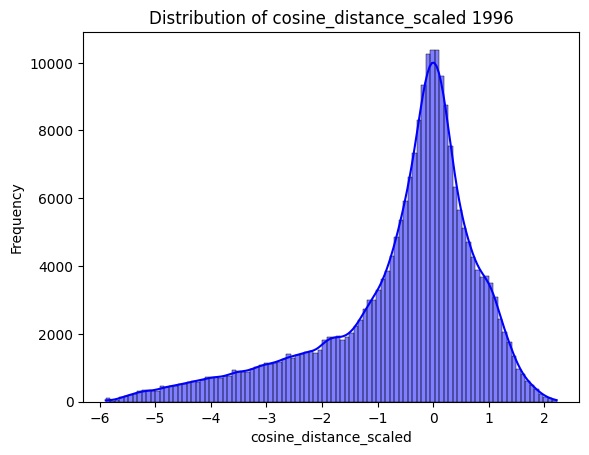

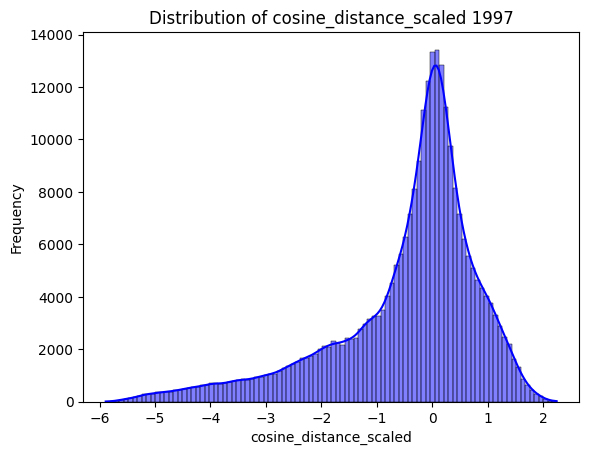

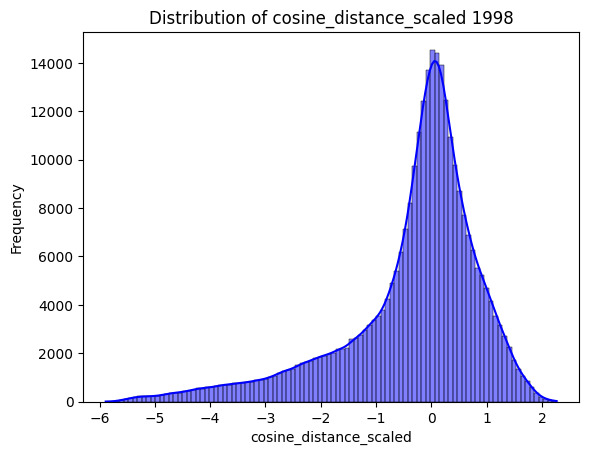

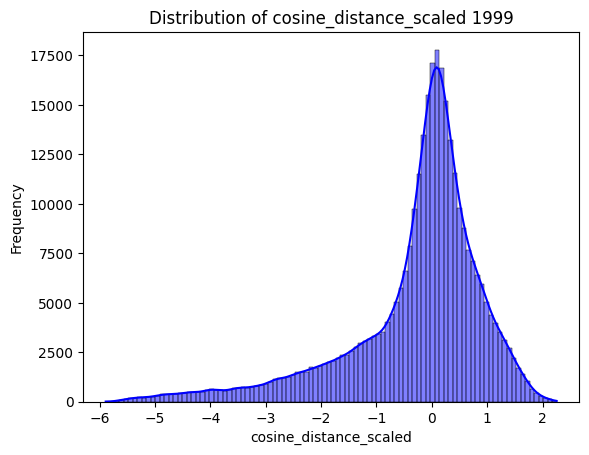

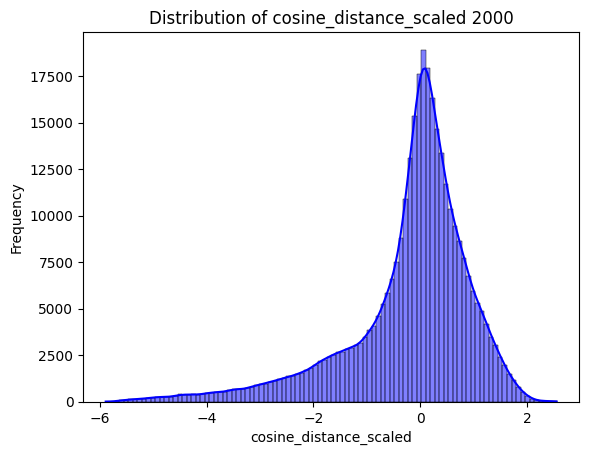

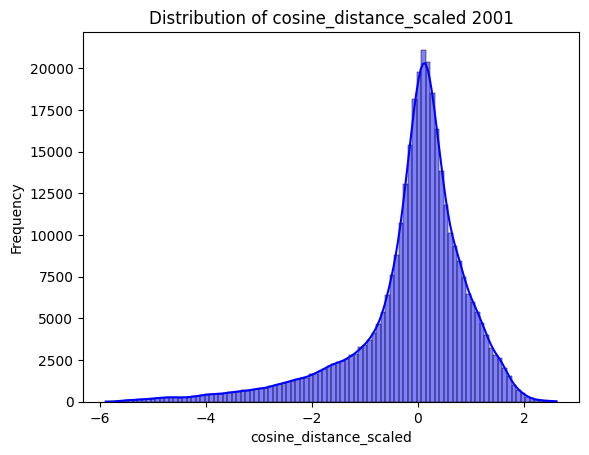

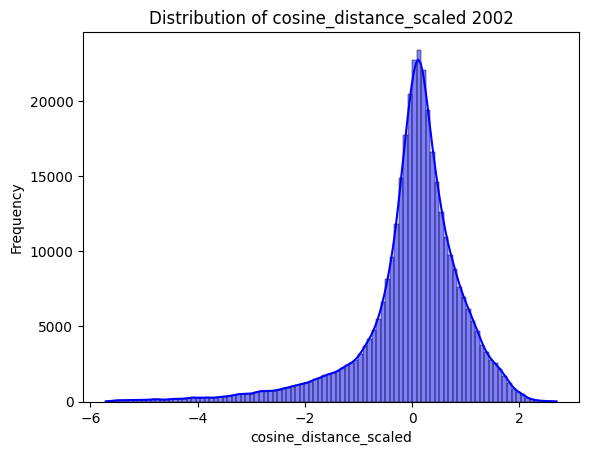

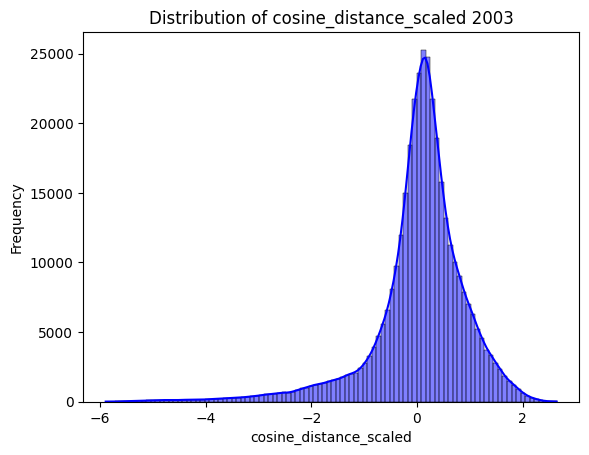

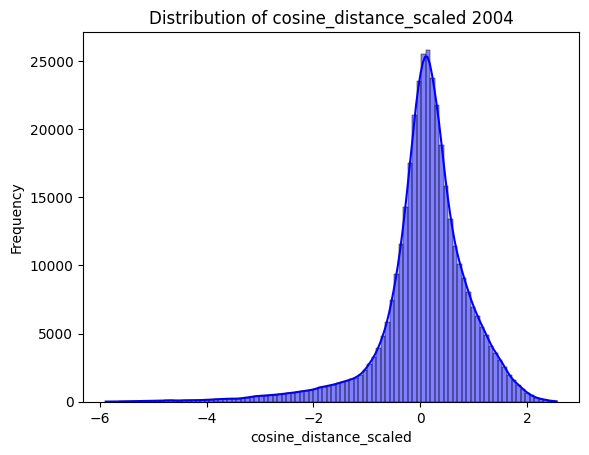

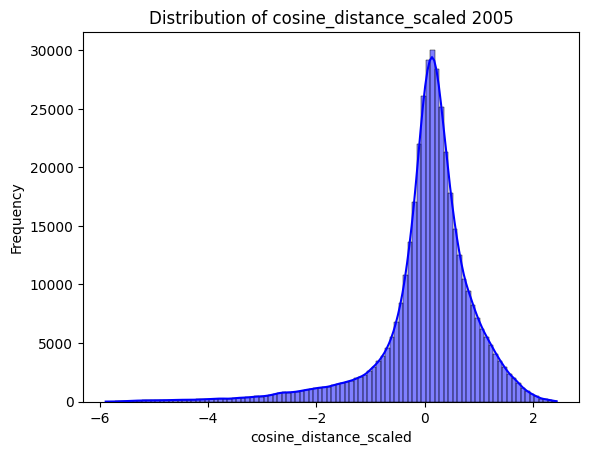

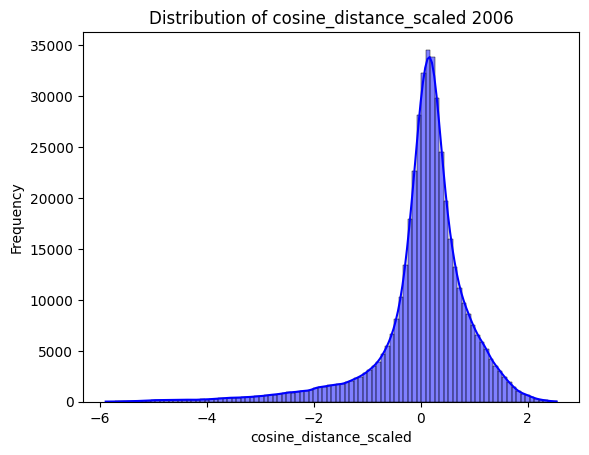

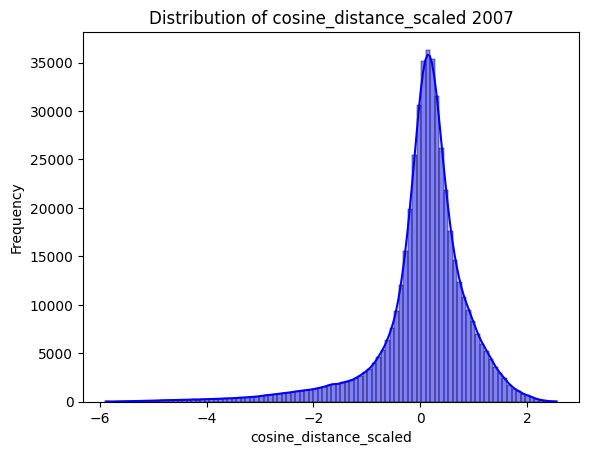

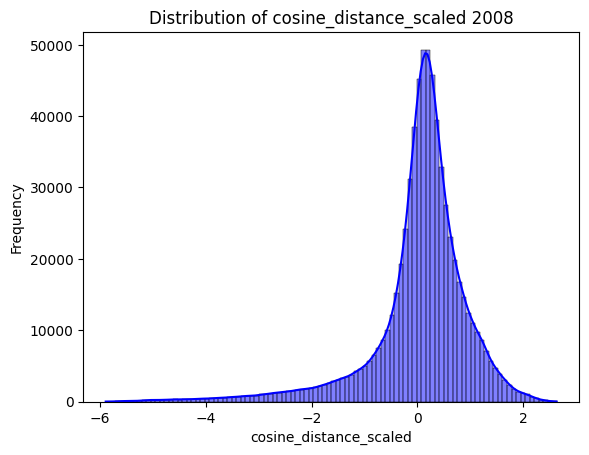

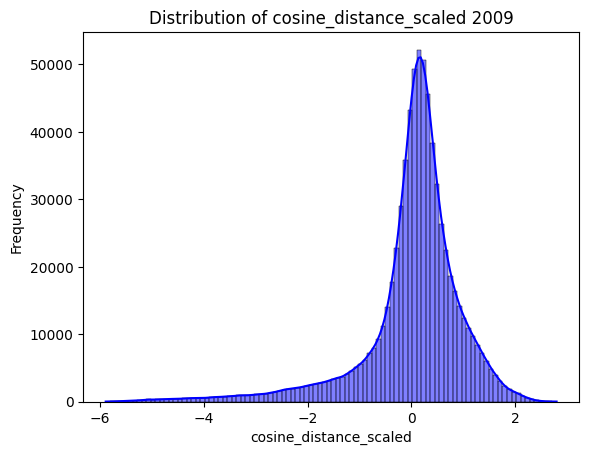

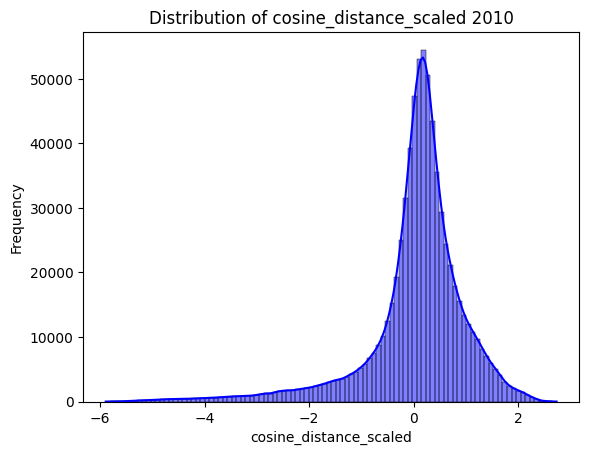

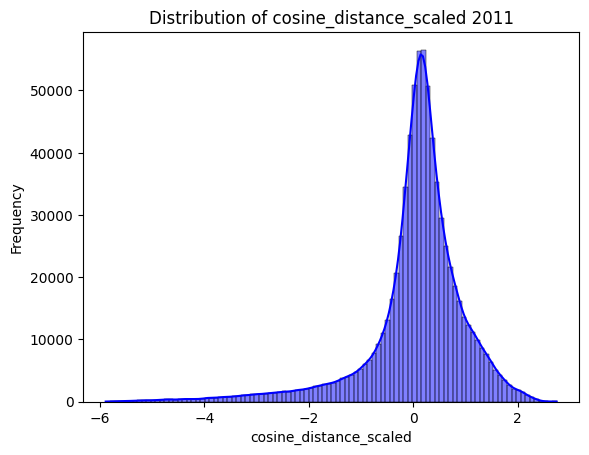

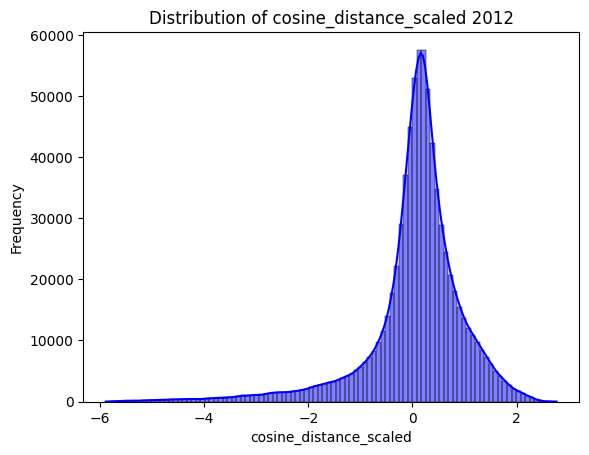

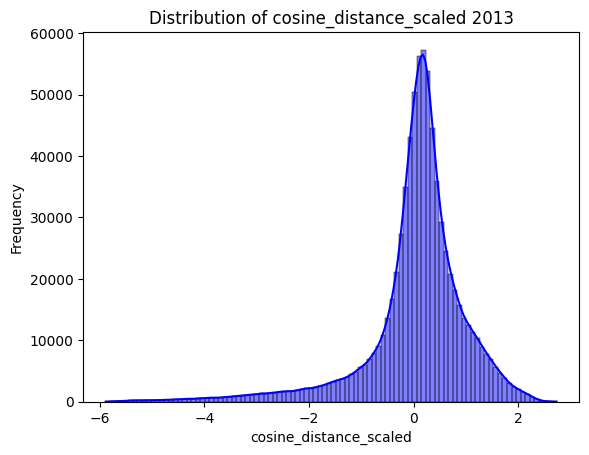

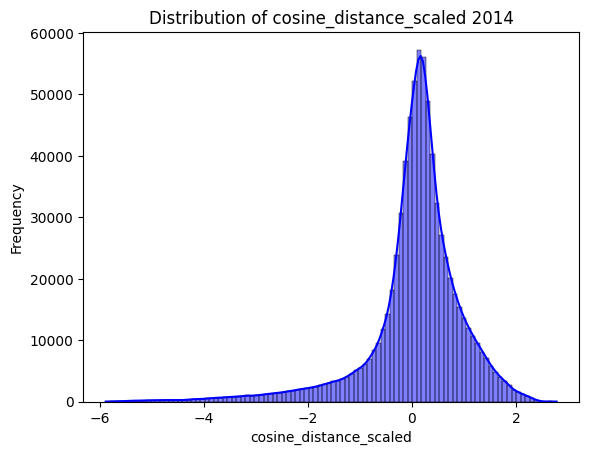

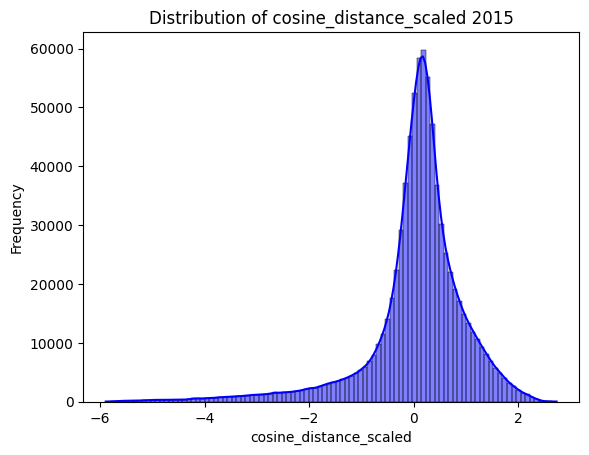

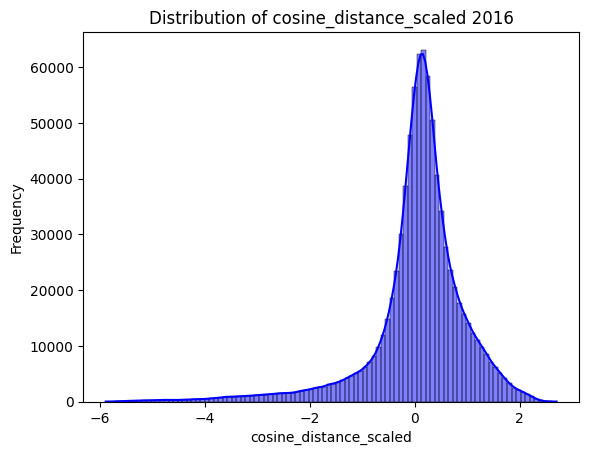

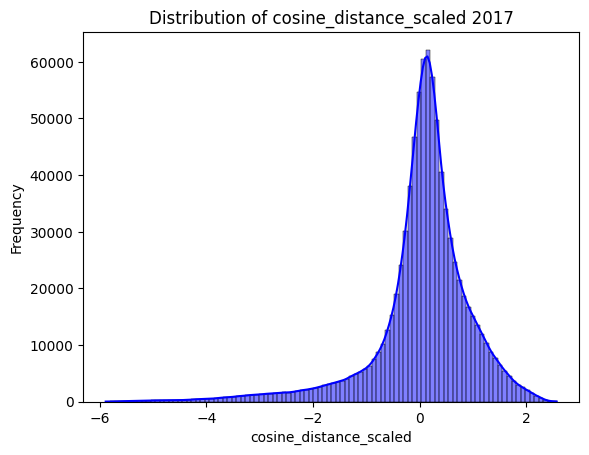

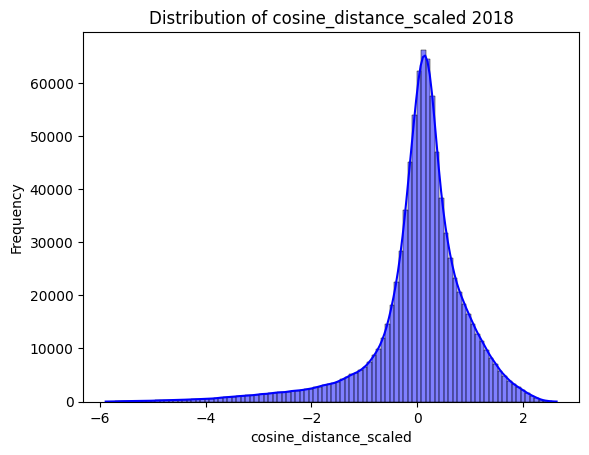

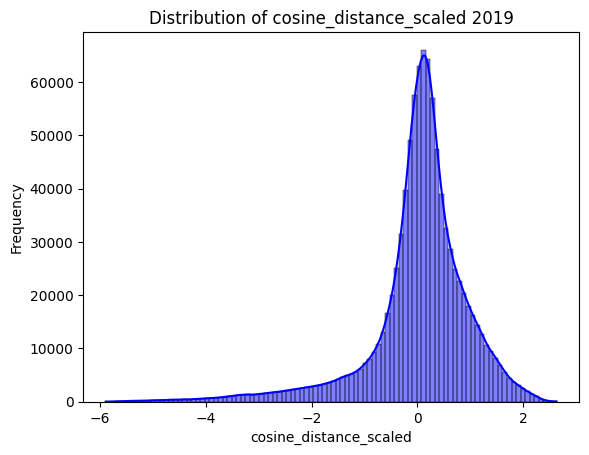

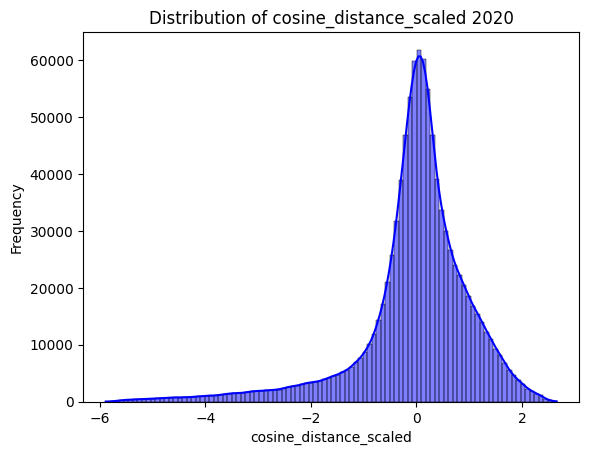

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of _____ separately for each year
def plot_distribution_by_year(pairs_df):
    years = pairs_df["year"].unique()
    plt.figure(figsize=(12, 8))

    for year in years:
        plt.figure()
        sns.histplot(
            pairs_df[pairs_df["year"] == year]["cosine_distance_scaled"],
            bins=100,
            kde=True,
            color="blue"
        )
        plt.title(f"Distribution of cosine_distance_scaled {year}")
        plt.xlabel("cosine_distance_scaled")
        plt.ylabel("Frequency")
        plt.show()

# Call the function to plot the graphs
plot_distribution_by_year(pairs_df)


## 3.2 Optimising Cut-Off Threshold for our MST

## 3.2 Grid Search

Due to computational constraints, we conduct a grid search for -4.5 to -0.1, with 0.1 intervals. Note that we chose -4.5 to -0.1 by eying the above plots and deem its a good starting search space.

In [ ]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
import warnings
from functools import partial
from joblib import Parallel, delayed
import logging
import os

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(
    filename='optuna_optimization.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Helper functions:


def calculate_avg_correlation(TO_ANALYSE_DF, cluster_df, cluster_type):
    """
    Calculate the mean correlation for each cluster type per year.

    Parameters:
    - TO_ANALYSE_DF (pd.DataFrame): Original DataFrame containing 'year', 'Company1', 'Company2', and 'correlation'.
    - cluster_df (pd.DataFrame): DataFrame with 'year' and 'clusters' columns.
    - cluster_type (str): Description of the cluster type for labeling.

    Returns:
    - pd.DataFrame: DataFrame with 'year' and average correlation for the cluster type.
    """
    avg_correlations = []

    for _, row in tqdm(cluster_df.iterrows(), desc=f"Calculating Stats for {cluster_type}", total=len(cluster_df)):
        year = row['year']
        clusters = row['clusters']
        year_data = TO_ANALYSE_DF[TO_ANALYSE_DF['year'] == year]
        cluster_stats = []

        for cluster_id, companies in clusters.items():
            if len(companies) <= 1:  # Skip clusters with only 1 company
                continue

            # Get all pairs of companies within the cluster
            cluster_pairs = year_data[
                (year_data['Company1'].isin(companies) & year_data['Company2'].isin(companies))
            ]
            # Calculate statistics for the cluster
            if not cluster_pairs.empty:
                try:
                    correlations = cluster_pairs['correlation']
                except KeyError:
                    # Handle alternative column name if 'correlation' doesn't exist
                    correlations = cluster_pairs['ActualCorrelation']
                cluster_stats.append(correlations.mean())

        # Aggregate statistics across clusters for the year
        if cluster_stats:
            avg_correlations.append({
                'year': year,
                f'{cluster_type}AvgCorrelation': sum(cluster_stats) / len(cluster_stats)
            })
        else:
            avg_correlations.append({
                'year': year,
                f'{cluster_type}AvgCorrelation': np.nan
            })

    return pd.DataFrame(avg_correlations)


def perform_clustering_per_year(
    TO_ANALYSE_DF,
    years_to_cluster,
    threshold,
    linkage_method='single'
):
    """
    Perform clustering on specified years using MST thresholding.

    Parameters:
    - pairs_df (pd.DataFrame): DataFrame containing company pairs with 'Company1', 'Company2', 'year', and 'sum_abs_diff_scaled_01'.
    - years_to_cluster (list): List of years to perform clustering on.
    - threshold (float): Threshold for forming clusters by removing edges from the MST.
    - linkage_method (str): Linkage method for hierarchical clustering ('single', 'complete', 'average', 'ward').

    Returns:
    - pd.DataFrame: DataFrame with 'year' and 'clusters' columns.
    """

    # Filter the DataFrame for the specified years
    filtered_df = TO_ANALYSE_DF[TO_ANALYSE_DF['year'].isin(years_to_cluster)]

    # Get sorted list of unique years within the specified subset
    unique_years = sorted(filtered_df['year'].unique())

    # Initialize list to collect clustering results
    clustering_results = []

    # Iterate over each year with a progress bar
    for year in tqdm(unique_years, desc=f"Clustering Years {years_to_cluster}"):
        # Filter data for the current year
        year_df = filtered_df[filtered_df['year'] == year]

        # Check if there are enough company pairs to form clusters
        if year_df.empty:
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        # Initialize an empty undirected graph
        G = nx.Graph()

        # Add edges to the graph with 'sum_abs_diff_scaled_01' as the weight
        edges = list(zip(year_df['Company1'], year_df['Company2'], year_df['cosine_distance_scaled']))
        G.add_weighted_edges_from(edges)

        # Check if the graph has at least one edge
        if G.number_of_edges() == 0:
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        # Compute the Minimum Spanning Tree (MST)
        try:
            mst = nx.minimum_spanning_tree(G, weight='weight')
        except Exception as e:
            print(f"Error computing MST for year {year}: {e}")
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        # Threshold the MST: remove edges with weight > threshold
        try:
            edges_to_remove = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] > threshold]
            mst.remove_edges_from(edges_to_remove)
        except Exception as e:
            print(f"Error thresholding MST for year {year}: {e}")
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        # Find connected components (clusters) in the thresholded MST
        clusters = list(nx.connected_components(mst))

        # Assign unique cluster IDs
        cluster_dict = {}
        for idx, cluster in enumerate(clusters, start=1):
            cluster_dict[idx] = sorted(list(cluster))

        # Append the result
        clustering_results.append({'year': year, 'clusters': cluster_dict})

    # Convert the results to a DataFrame
    result_df = pd.DataFrame(clustering_results)

    return result_df

In [ ]:
# ------------------------------------------------------------
# 0.  PRE-COMPUTE the MeanCorr grid once and cache to disk
# ------------------------------------------------------------
def build_meancorr_grid(TO_ANALYSE_DF, pairs_df,
                        theta_grid=np.arange(-4.5, -0.9, 0.1),
                        cache="meancorr_grid.pkl",
                        per_year_folder="Grid Search"):
    """
    Computes MeanCorr(year, θ) for every (year, θ) pair.

    * The full grid (years × θ) is saved to `cache`.
    * For every single year Y, a DataFrame
          Theta   MeanCorr
       is saved to   f"{per_year_folder}/{Y}_grid.pkl".
    """
    # --------------------------------------------------------------------
    # 0. Re-use cached master grid if present
    # --------------------------------------------------------------------
    if os.path.exists(cache):
        print(f"Loaded cached grid from {cache}")
        grid = pd.read_pickle(cache)
    else:
        years   = sorted(pairs_df["year"].unique())
        col_dfs = []

        for theta in tqdm(theta_grid, desc="Pre-computing MeanCorr grid"):
            cluster_df = perform_clustering_per_year(
                TO_ANALYSE_DF, years_to_cluster=years,
                threshold=theta, linkage_method="single"
            )
            mc_df = calculate_avg_correlation(
                TO_ANALYSE_DF, cluster_df, cluster_type=f"θ_{theta:.1f}"
            ).set_index("year")                          # rows = years

            col_dfs.append(
                mc_df[f"θ_{theta:.1f}AvgCorrelation"].rename(round(theta, 1))
            )

        grid = pd.concat(col_dfs, axis=1).sort_index()   # years × θ
        grid.to_pickle(cache)
        print(f"Saved master MeanCorr grid to {cache}")

    # --------------------------------------------------------------------
    # 1.  Save per-year grid-search tables
    # --------------------------------------------------------------------
    os.makedirs(per_year_folder, exist_ok=True)

    for year in grid.index:
        year_df = (grid.loc[year]
                        .reset_index()
                        .rename(columns={"index": "Theta", year: "MeanCorr"}))

        fname = os.path.join(per_year_folder, f"{year}_grid.pkl")
        year_df.to_pickle(fname)

    print(f"Saved per-year grid files to folder: {per_year_folder}")
    return grid



# ------------------------------------------------------------
# 1.  Walk-forward evaluation USING the pre-computed grid
# ------------------------------------------------------------
def rolling_fw_evaluation_grid(grid, K=5,
                               results_csv="./Grid Search/oos_mean_corr_by_year.csv"):
    """
    grid : DataFrame, rows = years, columns = θ, values = MeanCorr(year,θ)
    For each year t:
        * find θ that maximises the average of grid[t-K … t-1]
        * record that θ and grid[t, θ]  (OOS MeanCorr)
    """
    years       = grid.index.tolist()
    theta_vals  = grid.columns.tolist()
    oos_records = []

    # ensure output CSV has a header
    if not os.path.exists(results_csv):
        pd.DataFrame(columns=["Year","Theta","MeanCorr_OOS"]).to_csv(
            results_csv, index=False)

    for i in range(K, len(years)):
        test_year   = years[i]
        train_slice = grid.loc[years[i-K:i]]      # DataFrame (K rows × θ)

        # 1) pick θ* that maximises the TRAIN-window mean
        theta_star  = train_slice.mean(axis=0).idxmax()

        # 2) OOS MeanCorr for the test year
        mc_oos      = grid.loc[test_year, theta_star]

        # 3) store & append
        rec = {"Year": test_year,
               "Theta": theta_star,
               "MeanCorr_OOS": mc_oos}
        oos_records.append(rec)
        print(f"{test_year}: θ*={theta_star:.1f}  OOS MC={mc_oos:.3f}")

        pd.DataFrame([rec]).to_csv(
            results_csv, mode="a", header=False, index=False)

    return pd.DataFrame(oos_records)

In [ ]:
global cluster_name
cluster_name = "C-CD" # C-CD = Cosine Distance
TO_ANALYSE_DF = pairs_df

theta_grid = np.arange(-4.5, -0.9, 0.1)          # 36 values
mc_grid    = build_meancorr_grid(TO_ANALYSE_DF, pairs_df, theta_grid)

oos_table  = rolling_fw_evaluation_grid(mc_grid, K=5,
                                        results_csv="./Grid Search/oos_mean_corr_by_year.csv")

print(oos_table.head())


Clustering Years [np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020)]:  84%|████████▍ | 21/25 [01:24<00:23,  5.90s/it]
Clustering Years [np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020)]:  88%|████████▊ | 22/25 [01:31<00:18,  6.28s/it]
Clustering Years [np.int64(1996), np.int64(1997), np.int64(1998),

Saved master MeanCorr grid to meancorr_grid.pkl
Saved per-year grid files to folder: Grid Search
2001: θ*=-2.5  OOS MC=0.388
2002: θ*=-2.6  OOS MC=0.442
2003: θ*=-2.6  OOS MC=0.320
2004: θ*=-2.9  OOS MC=0.429
2005: θ*=-2.9  OOS MC=0.409
2006: θ*=-2.9  OOS MC=0.215
2007: θ*=-2.9  OOS MC=0.295
2008: θ*=-2.5  OOS MC=0.357
2009: θ*=-2.8  OOS MC=0.433
2010: θ*=-2.8  OOS MC=0.349
2011: θ*=-2.6  OOS MC=0.443
2012: θ*=-2.6  OOS MC=0.338
2013: θ*=-2.8  OOS MC=0.450
2014: θ*=-3.1  OOS MC=0.405
2015: θ*=-3.0  OOS MC=0.432
2016: θ*=-4.2  OOS MC=0.333
2017: θ*=-3.1  OOS MC=0.347
2018: θ*=-3.1  OOS MC=0.469
2019: θ*=-3.1  OOS MC=0.324
2020: θ*=-3.1  OOS MC=0.517
   Year  Theta  MeanCorr_OOS
0  2001   -2.5      0.388346
1  2002   -2.6      0.442456
2  2003   -2.6      0.320003
3  2004   -2.9      0.428710
4  2005   -2.9      0.409477


## 3.4 OOS Rolling

In [ ]:
oos_table

,Year,Theta,MeanCorr_OOS
0,2001,-2.5,0.388346
1,2002,-2.6,0.442456
2,2003,-2.6,0.320003
3,2004,-2.9,0.428710
4,2005,-2.9,0.409477
5,2006,-2.9,0.214945
6,2007,-2.9,0.294844
7,2008,-2.5,0.357396
8,2009,-2.8,0.433034
9,2010,-2.8,0.348722


Our final eval metric is 0.385:

In [ ]:
oos_table["MeanCorr_OOS"].mean()

np.float64(0.384833722697166)

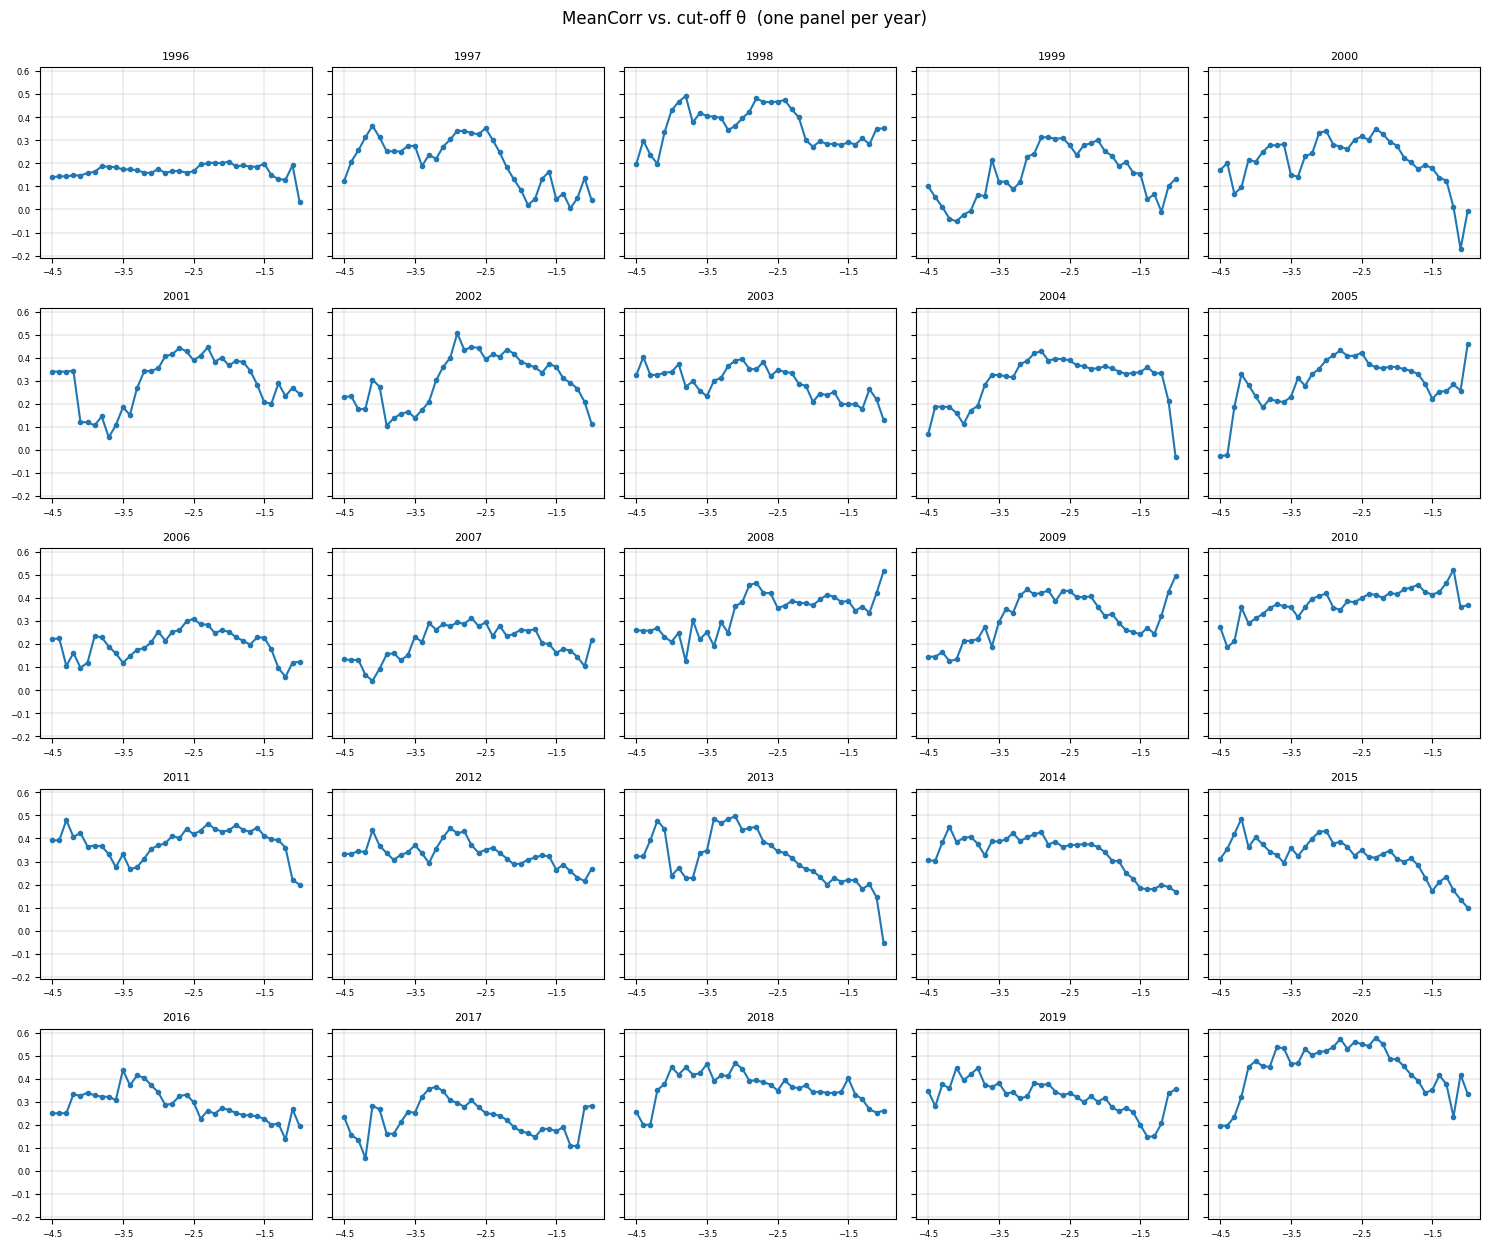

In [ ]:
import os, math, pandas as pd
import matplotlib.pyplot as plt

GRID_DIR = "./Grid Search"

# collect the yearly grid files
files = [f for f in os.listdir(GRID_DIR) if f.endswith("_grid.pkl")]
years = sorted(int(f.split("_")[0]) for f in files)

n      = len(years)
ncols  = 5
nrows  = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols,
                        figsize=(ncols*3, nrows*2.5),
                        sharey=True)

for ax, y in zip(axs.flat, years):
    df = pd.read_pickle(f"{GRID_DIR}/{y}_grid.pkl")
    ax.plot(df["Theta"], df["MeanCorr"], marker="o", ms=3)
    ax.set_title(str(y), fontsize=8)
    ax.set_xticks([-4.5,-3.5,-2.5,-1.5])
    ax.tick_params(axis="both", labelsize=6)
    ax.grid(True, lw=0.3)

# hide empty subplots
for ax in axs.flat[n:]:
    ax.axis("off")

fig.suptitle("MeanCorr vs. cut-off θ  (one panel per year)",
             fontsize=12, y=0.995)
fig.tight_layout()
plt.show()


In [ ]:
fig.savefig("grid_search_smoothness.png", dpi=300, bbox_inches="tight")

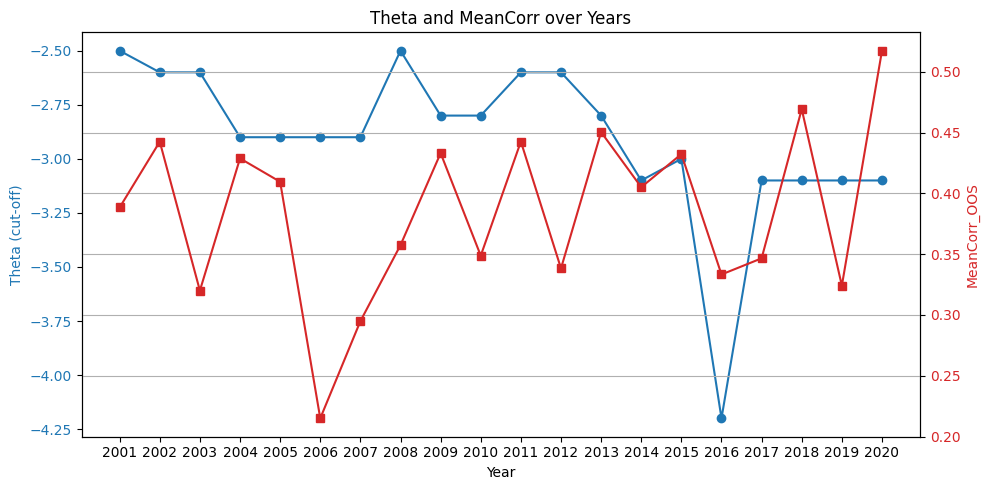

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Theta line
ax1.plot(oos_table["Year"], oos_table["Theta"], marker='o', color='tab:blue', label='Theta (cut-off)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Theta (cut-off)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(oos_table["Year"])  # Ensure integer x-axis ticks

# MeanCorr_OOS on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(oos_table["Year"], oos_table["MeanCorr_OOS"], marker='s', color='tab:red', label='MeanCorr_OOS')
ax2.set_ylabel("MeanCorr_OOS", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Theta and MeanCorr over Years")
fig.tight_layout()
plt.grid(True)
plt.show()

fig.savefig("grid_search_param_smoothness.png", dpi=300, bbox_inches="tight")

## 3.4.1 Creating Clusters for OOS

In [ ]:
import pandas as pd
from tqdm import tqdm
import networkx as nx


# Define a modified clustering function that takes per-year thresholds
def perform_year_specific_clustering(TO_ANALYSE_DF, oos_table):
    clustering_results = []

    for _, row in tqdm(oos_table.iterrows(), total=len(oos_table), desc="Clustering with Year-Specific Thresholds"):
        year = row['Year']
        threshold = row['Theta']
        year_df = TO_ANALYSE_DF[TO_ANALYSE_DF['year'] == year]

        if year_df.empty:
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        G = nx.Graph()
        edges = list(zip(year_df['Company1'], year_df['Company2'], year_df['cosine_distance_scaled']))
        G.add_weighted_edges_from(edges)

        if G.number_of_edges() == 0:
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        try:
            mst = nx.minimum_spanning_tree(G, weight='weight')
            edges_to_remove = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] > threshold]
            mst.remove_edges_from(edges_to_remove)
        except Exception as e:
            print(f"Error for year {year}: {e}")
            clustering_results.append({'year': year, 'clusters': {}})
            continue

        clusters = list(nx.connected_components(mst))
        cluster_dict = {idx: sorted(list(cluster)) for idx, cluster in enumerate(clusters, start=1)}
        clustering_results.append({'year': year, 'clusters': cluster_dict})

    return pd.DataFrame(clustering_results)

In [ ]:
rollingCD_cluster_df = perform_year_specific_clustering(TO_ANALYSE_DF, oos_table)
rollingCD_cluster_df["year"] = rollingCD_cluster_df["year"].astype(int)
rollingCD_cluster_df

,year,clusters
0,2001,"{1: [10326, 10327, 10328, 10329, 10334, 10339,..."
1,2002,"{1: [10471], 2: [10473, 10480, 10483, 10484, 1..."
2,2003,"{1: [10619], 2: [10620], 3: [10621], 4: [10622..."
3,2004,"{1: [10790, 10810, 10819, 10833, 10841, 10851,..."
4,2005,"{1: [10944, 10947, 10997, 11004, 11017, 11020,..."
5,2006,"{1: [11104], 2: [11106, 30398, 30445], 3: [111..."
6,2007,"{1: [11287], 2: [11289, 11290, 11307, 11329, 1..."
7,2008,"{1: [11478], 2: [11479], 3: [11481], 4: [11485..."
8,2009,"{1: [11728], 2: [11729], 3: [11730, 11753, 117..."
9,2010,"{1: [11973, 11979, 11981, 11985, 12010, 12013,..."


In [ ]:
# rollingCD_cluster_df.to_pickle("./Final Results/year_cluster_dfrollingCD.pkl")

In [23]:
rollingCD_cluster_df = pd.read_pickle(f"./Final Results/year_cluster_dfrollingCD.pkl")
year_cluster_BERT = pd.read_pickle(f"./Final Results/year_cluster_dfBERT.pkl")
year_cluster_SBERT = pd.read_pickle(f"./Final Results/year_cluster_dfSBERT.pkl")
year_cluster_PALM = pd.read_pickle(f"./Final Results/year_cluster_dfPaLM-gecko.pkl")

cluster_name = "C-CD" # C-CD = Cosine Distance
TO_ANALYSE_DF = pairs_df
threshold = -2.876

custom_cluster_avg_corr_rollingCD = calculate_avg_correlation(TO_ANALYSE_DF, rollingCD_cluster_df, "CustomClusterRollingCD")
custom_cluster_avg_corr_BERT = calculate_avg_correlation(TO_ANALYSE_DF, year_cluster_BERT, "CustomClusterBERT")
custom_cluster_avg_corr_SBERT = calculate_avg_correlation(TO_ANALYSE_DF, year_cluster_SBERT, "CustomClusterSBERT")
custom_cluster_avg_corr_PALM = calculate_avg_correlation(TO_ANALYSE_DF, year_cluster_PALM, "CustomClusterPALM")

final_results = pd.merge(custom_cluster_avg_corr_rollingCD, sic_avg_corr, on='year', how='outer')
final_results = pd.merge(final_results, custom_cluster_avg_corr_BERT, on='year', how='outer')
final_results = pd.merge(final_results, custom_cluster_avg_corr_SBERT, on='year', how='outer')
final_results = pd.merge(final_results, custom_cluster_avg_corr_PALM, on='year', how='outer')

final_results = pd.merge(final_results, industry_avg_corr, on='year', how='outer')

temp_results = final_results
temp_results

Calculating Stats for CustomClusterPALM: 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]


,year,CustomClusterRollingCDAvgCorrelation,SICAvgCorrelation,CustomClusterBERTAvgCorrelation,CustomClusterSBERTAvgCorrelation,CustomClusterPALMAvgCorrelation,IndustryAvgCorrelation
0,1993,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,NaN,0.203218,0.130258,0.174151,0.169852,0.170543
4,1997,NaN,0.183976,0.186479,0.194801,0.211920,0.160264
5,1998,NaN,0.297463,0.286430,0.304397,0.303501,0.238942
6,1999,NaN,0.152918,0.120152,0.172725,0.165493,0.126681
7,2000,NaN,0.122219,0.136986,0.148120,0.161636,0.151061
8,2001,0.388346,0.229643,0.187680,0.217450,0.200335,0.158236
9,2002,0.442456,0.288414,0.233585,0.269398,0.264144,0.272091


In [24]:
# Drops years before 2000 (since rolling starts from 2001)
temp_results = temp_results.drop([0,1,2,3,4,5,6])

In [25]:
temp_results["CustomClusterRollingCDAvgCorrelation"].mean()

np.float64(0.384833722697166)

In [18]:
pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.5 MB/s eta 0:00:00


In [26]:
## Plot
import plotly.graph_objects as go
import kaleido

# Initialize the figure
fig = go.Figure()

# Add traces for each cluster type
fig.add_trace(go.Scatter(
    x=temp_results["year"],
    y=temp_results["CustomClusterRollingCDAvgCorrelation"],
    mode='lines+markers',
    name=r"$\huge{G_{\text{CDR}} \text{ = Sparse Features (ρ̄: 0.385)   }}$",
    line=dict(color = 'rgb(0,68,136)', width=2.5, dash='solid'),
    marker=dict(symbol='triangle-up', size=10)
))
fig.add_trace(go.Scatter(
    x=temp_results["year"],
    y=temp_results["CustomClusterPALMAvgCorrelation"],
    mode='lines+markers',
    name=r"$\huge{G_{\text{PALM}} \text{ = Embedders (ρ̄: 0.219)   }}$",
    line=dict(color='rgb(187,85,102)', width=2.5, dash='solid'),
    marker=dict(symbol='triangle-up', size=10)
))

# Add SIC
fig.add_trace(go.Scatter(
    x=temp_results["year"],
    y=temp_results["SICAvgCorrelation"],
    mode='lines+markers',
    name= r"$\huge{G_{\text{SIC}} \text{ (ρ̄: 0.231)   }}$",
    line=dict(color='rgb(221,170,51)', width=2.5, dash='solid'),
    marker=dict(symbol='square', size=10)
))


fig.update_layout(

    xaxis=dict(
        title="Year",
        tickmode='linear',
        dtick=2,  # Change from dtick=1 to dtick=2 for every 2 years
        title_font=dict(size=40),
        tickfont=dict(size=30),
        range=[2000, 2020],
        gridcolor="rgba(0, 0, 0, 0.2)",    # Set grid color to black
        gridwidth=1          # Increase grid line thickness
    ),
    yaxis=dict(
        title=r"Mean Correlation",
        title_font=dict(size=40),
        tickfont=dict(size=30),
        tickformat=".2f",
        gridcolor="rgba(0, 0, 0, 0.2)",  # Set grid color to black
        gridwidth=1          # Increase grid line thickness
    ),
    legend=dict(
        orientation='h',       # Horizontal legend
        x=0.0,                 # Start from the left
        y=0.97,                 # Place it above the plot area
        xanchor='left',
        yanchor='bottom',
        bgcolor="rgba(255,255,255,0.4)",
        bordercolor="black",
    ),
    template="plotly_white",
    margin=dict(t=150),
    width=1300,  # Adjust width
    height=900  # Adjust height
)
# Add annotations for all lines
fig.add_annotation(
    x=2009-1.5,
    y=temp_results["CustomClusterRollingCDAvgCorrelation"][(2009-1993)+1]+0.028,
    text=r"$\LARGE{Sparse \; Features}$",
    showarrow=False,
    xanchor="left",
    font=dict(size=200, color="rgb(0,68,136)")
)


fig.add_annotation(
    x=2009-1.05,
    y=temp_results["CustomClusterPALMAvgCorrelation"][(2008-1993)+1]-0.015,
    text=r"$\LARGE{Embedders}$",
    showarrow=False,
    xanchor="left",
    font=dict(size=200, color="rgb(187,85,102)")
)


fig.add_annotation(
    x=2009,
    y=temp_results["SICAvgCorrelation"][(2008-1993)+1]+0.06,
    text=r"$\LARGE{SIC}$",
    showarrow=False,
    xanchor="left",
    font=dict(size=200, color="rgb(221,170,51)")
)



# Export high-resolution image
fig.write_image(f'CD_R_PALM_final_plot_resized.png', scale=1, width=1920, height=1080)


# Show the figure
fig.show()



# 4 Cointegration

In [27]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 116.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-linux_x86_64.whl size=886604 sha256=f9b38fca00a22ac115712d85c8cff0d0fca98c354a0700717b09dc7771467537
  Stored in directory: /root/.cache/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee


In [28]:
import yfinance as yf

In [32]:
CD_cluster_df = pd.read_pickle(f"./Final Results/year_cluster_dfC-CD.pkl")
CD_cluster_df["year"] = CD_cluster_df["year"].astype(int)
CD_cluster_df = CD_cluster_df[~CD_cluster_df['year'].isin([1993, 1994, 1995])].reset_index(drop=True)

Rolling_CD_cluster_df = pd.read_pickle(f"./Final Results/year_cluster_dfrollingCD.pkl")
Rolling_CD_cluster_df["year"] = Rolling_CD_cluster_df["year"].astype(int)
Rolling_CD_cluster_df = Rolling_CD_cluster_df[~Rolling_CD_cluster_df['year'].isin([1993, 1994, 1995])].reset_index(drop=True)

TPG_Cluster_df = pd.read_pickle(f"./Final Results/year_cluster_dfPaLM-gecko.pkl")
TPG_Cluster_df["year"] = TPG_Cluster_df["year"].astype(int)
TPG_Cluster_df = TPG_Cluster_df[~TPG_Cluster_df['year'].isin([1993, 1994, 1995])].reset_index(drop=True)

In [34]:
year_SIC_cluster_df = pd.read_pickle("year_SIC_cluster_mapping.pkl")
year_Industry_cluster_df = pd.read_pickle("year_Industry_cluster_mapping.pkl")
time_series_data = pd.read_pickle("cik_ticker_timeseries.pkl")
with open("index_cik_ticker_map.json", "r") as json_file:
    index_cik_ticker_map = json.load(json_file)

In [33]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.2 MB/s eta 0:00:00


In [35]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from itertools import combinations
from tqdm import tqdm
import os
import pickle
import itertools
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

# Function to get price series
def get_price_series(company_index, time_series_data, start_date=None, end_date=None):
    """
    Fetch the price series for a given company index, filtered by start and end dates.
    """
    if str(company_index) not in index_cik_ticker_map:
        return None
    tickers = index_cik_ticker_map[str(company_index)]["ticker"]

    for ticker in tickers:
        ticker_data = time_series_data[time_series_data['ticker'] == ticker]
        if not ticker_data.empty:
            timeseries = ticker_data.iloc[0]['timeseries']
            timeseries = pd.Series(timeseries)
            timeseries.index = pd.to_datetime(timeseries.index)

            # Filter by date range if specified
            if start_date and end_date:
                timeseries = timeseries[start_date:end_date]
            return timeseries.sort_index()
    return None

def identify_and_save_cointegrated_pairs(
    cluster_type, cluster_df, time_series_data, year, correlation_threshold=0.95, top_n=10000000
):
    """
    Identify and rank cointegrated pairs for each cluster type by p-value, saving the top N pairs.
    Only pairs with correlation above the specified threshold are tested for cointegration.
    Clusters from the specified year and the previous two years are used.
    """
    import itertools
    from statsmodels.tsa.stattools import adfuller
    from tqdm import tqdm

    # Determine the years to include
    years_to_include = [year - i for i in range(3)]  # [year, year -1, year -2]

    # Select clusters for the specified years
    clusters_list = cluster_df.loc[cluster_df['year'].isin(years_to_include), 'clusters'].values

    # Combine clusters from different years
    combined_clusters = {}
    for clusters in clusters_list:
        for cluster_id, companies in clusters.items():
            # Create a unique key for each cluster to avoid ID conflicts
            key = f"{cluster_id}_{cluster_df.loc[cluster_df['clusters'] == clusters, 'year'].values[0]}"
            if key in combined_clusters:
                combined_clusters[key].extend(companies)
                # Remove duplicates
                combined_clusters[key] = list(set(combined_clusters[key]))
            else:
                combined_clusters[key] = companies.copy()

    cointegrated_pairs = []

    # Initialize tqdm for clusters with total number of clusters
    total_clusters = len(combined_clusters)
    cluster_iterator = tqdm(combined_clusters.items(), desc=f"Processing Clusters for {cluster_type}", total=total_clusters)

    for cluster_id, companies in cluster_iterator:
        if len(companies) < 2:
            continue

        # Generate all possible pairs within the cluster
        pair_combinations = list(itertools.combinations(companies, 2))
        total_pairs = len(pair_combinations)

        # Initialize tqdm for pairs within the current cluster
        pair_iterator = tqdm(pair_combinations, desc=f"Cluster {cluster_id}", leave=False, total=total_pairs)

        for company1, company2 in pair_iterator:
            # Fetch price series for the past three years
            start_date = f"2002-01-01"
            end_date = f"{year}-12-31"
            series1 = get_price_series(company1, time_series_data, start_date=start_date, end_date=end_date)
            series2 = get_price_series(company2, time_series_data, start_date=start_date, end_date=end_date)
            if series1 is None or series2 is None:
                continue

            # Align lengths and dates
            combined_df = pd.DataFrame({'series1': series1, 'series2': series2}).dropna()
            if len(combined_df) < 60:
                continue

            # Check if all values in series are identical
            if combined_df['series1'].nunique() <= 1 or combined_df['series2'].nunique() <= 1:
                continue

            # Calculate correlation
            correlation = combined_df['series1'].corr(combined_df['series2'])

            # Check correlation threshold
            if abs(correlation) < correlation_threshold:
                continue  # Skip pairs with low correlation

            # ADF test on the spread (difference) between the two series
            spread = combined_df['series1'] - combined_df['series2']
            adf_result = adfuller(spread)
            p_value = adf_result[1]

            if p_value < 0.05:  # p-value < 0.05 indicates stationarity (cointegration)
                cointegrated_pairs.append({
                    'Company1': company1,
                    'Company2': company2,
                    'ClusterID': cluster_id,
                    'Correlation': correlation,
                    'ADFStat': adf_result[0],
                    'p-value': p_value
                })

    print("Identified # of cointegrated pairs:", len(cointegrated_pairs))
    # Convert to DataFrame
    cointegrated_pairs_df = pd.DataFrame(cointegrated_pairs)

    # Sort by p-value and select top N pairs
    try:
        cointegrated_pairs_df = cointegrated_pairs_df.sort_values(by='p-value').head(top_n)
    except:
        print(cointegrated_pairs_df)
    # Save to CSV
    cointegrated_pairs_df.to_csv(f'cointegrated_pairs_{cluster_type}.csv', index=False)
    print(f"Saved top {top_n} cointegrated pairs for {cluster_type} to cointegrated_pairs_{cluster_type}.csv")



    return cointegrated_pairs_df


## 4.1 Trading Code

In [36]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import logging
import random

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class Position:
    def __init__(self, pair, entry_date, position_type, units1, units2, entry_price1, entry_price2):
        """
        Initialize a Position.

        Parameters:
        - pair: Tuple identifying the pair (e.g., (Company1, Company2))
        - entry_date: Date when the position was opened
        - position_type: 'long_spread' or 'short_spread'
        - units1: Units of Asset 1 (positive for buy, negative for sell)
        - units2: Units of Asset 2 (positive for buy, negative for sell)
        - entry_price1: Entry price of Asset 1
        - entry_price2: Entry price of Asset 2
        """
        self.pair = pair
        self.entry_date = entry_date
        self.position_type = position_type  # 'long_spread' or 'short_spread'
        self.units1 = units1
        self.units2 = units2
        self.entry_price1 = entry_price1
        self.entry_price2 = entry_price2
        self.exit_date = None
        self.exit_price1 = None
        self.exit_price2 = None
        self.pnl = 0

    def close(self, exit_date, exit_price1, exit_price2):
        """
        Close the position and calculate PnL.

        Parameters:
        - exit_date: Date when the position was closed
        - exit_price1: Exit price of Asset 1
        - exit_price2: Exit price of Asset 2

        Returns:
        - pnl: Profit and Loss from the position
        """
        self.exit_date = exit_date
        self.exit_price1 = exit_price1
        self.exit_price2 = exit_price2

        # Calculate PnL for Asset 1
        pnl1 = self.units1 * (self.exit_price1 - self.entry_price1)

        # Calculate PnL for Asset 2
        pnl2 = self.units2 * (self.exit_price2 - self.entry_price2)

        self.pnl = pnl1 + pnl2
        return self.pnl

    def __repr__(self):
        return (f"Position(pair={self.pair}, entry_date={self.entry_date.date()}, "
                f"type={self.position_type}, units1={self.units1:.4f}, units2={self.units2:.4f})")

class PairTrader:
    def __init__(self, capital_per_pair=10000, delta=1.0, initial_capital=100000, index_cik_ticker_map=None):
        """
        Initialize the PairTrader.

        Parameters:
        - capital_per_pair: Capital allocated per pair trade
        - delta: Entry threshold (δ) for z-score
        - initial_capital: Starting cash for the portfolio
        - index_cik_ticker_map: Mapping from company indices to tickers
        """
        self.capital_per_pair = capital_per_pair
        self.delta = delta  # Entry threshold (δ)
        self.positions = []  # All closed positions
        self.open_positions = []  # Currently open positions
        self.cumulative_pnl = 0
        self.total_trades = 0
        self.pnl_series = pd.Series(dtype=float)  # Realized PnL over time

        # Portfolio tracking
        self.initial_capital = initial_capital
        self.cash = initial_capital  # Can go negative
        self.portfolio_value_series = pd.Series(dtype=float)  # Cumulative portfolio value over time

        # Company index to ticker mapping
        self.index_cik_ticker_map = index_cik_ticker_map if index_cik_ticker_map is not None else {}

        # Configure logging within the class
        self.logger = logging.getLogger(self.__class__.__name__)
        if not self.logger.handlers:
            # Prevent adding multiple handlers if multiple instances are created
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            self.logger.addHandler(handler)
            self.logger.setLevel(logging.INFO)

    def get_price_series(self, company_index, time_series_data, start_date=None, end_date=None):
        """
        Fetch the price series for a given company index, filtered by start and end dates.
        """
        if str(company_index) not in self.index_cik_ticker_map:
            # self.logger.warning(f"Company index {company_index} not found in index_cik_ticker_map.")
            return None
        tickers = self.index_cik_ticker_map[str(company_index)]["ticker"]

        for ticker in tickers:
            ticker_data = time_series_data[time_series_data['ticker'] == ticker]
            if not ticker_data.empty:
                timeseries = ticker_data.iloc[0]['timeseries']
                timeseries = pd.Series(timeseries)
                timeseries.index = pd.to_datetime(timeseries.index)

                # Filter by date range if specified
                if start_date and end_date:
                    timeseries = timeseries[start_date:end_date]
                # self.logger.info(f"Fetched price series for ticker {ticker} (Company {company_index}).")
                return timeseries.sort_index()
        # self.logger.warning(f"No price series found for Company index {company_index} with tickers {tickers}.")
        return None

    def trade_pair(self, pair, time_series_data, start_date, end_date):
        """
        Trade a single pair over a specified period.

        Parameters:
        - pair: Dictionary with 'Company1' and 'Company2' IDs
        - time_series_data: DataFrame containing price data for all companies
        - start_date: Start date for trading
        - end_date: End date for trading
        """
        self.logger.info(f"Trading pair: {pair['Company1']} & {pair['Company2']} from {start_date} to {end_date}")

        # Fetch price series for the OOS period
        series1 = self.get_price_series(pair['Company1'], time_series_data, start_date=start_date, end_date=end_date)
        series2 = self.get_price_series(pair['Company2'], time_series_data, start_date=start_date, end_date=end_date)

        # Check if both series exist and cover the entire OOS period
        if series1 is None or series2 is None:
            # self.logger.warning(f"Missing price series for pair {pair['Company1']} & {pair['Company2']}. Skipping trade.")
            return
        if pd.Timestamp(series1.index[-1]) < pd.Timestamp("2020-12-01") or pd.Timestamp(series2.index[-1]) < pd.Timestamp("2020-12-01"):
            # One or both assets are delisted before the end of the OOS period
            # self.logger.warning(f"One or both assets in pair {pair['Company1']} & {pair['Company2']} are delisted before {end_date}. Skipping trade.")
            return

        # Align lengths and dates
        combined_df = pd.DataFrame({'series1': series1, 'series2': series2}).dropna()
        if len(combined_df) < 60:  # Minimum number of data points required
            # self.logger.warning(f"Insufficient data for pair {pair['Company1']} & {pair['Company2']}. Required: 60, Available: {len(combined_df)}. Skipping trade.")
            return

        # Perform regression on the entire OOS data to get residuals
        X = sm.add_constant(combined_df['series2'])
        model = sm.OLS(combined_df['series1'], X)
        results = model.fit()

        # Calculate residuals and z-scores
        combined_df['predicted'] = results.predict(X)
        combined_df['residuals'] = combined_df['series1'] - combined_df['predicted']
        mean = combined_df['residuals'].mean()
        std = combined_df['residuals'].std()
        combined_df['z_score'] = (combined_df['residuals'] - mean) / std

        # Log residual statistics
        # self.logger.info(f"Residual statistics for pair {pair['Company1']} & {pair['Company2']}: mean={mean:.4f}, std={std:.4f}, max={combined_df['z_score'].max():.4f}, min={combined_df['z_score'].min():.4f}")

        position = None
        last_z_score = None  # To track crossover direction

        for date, row in combined_df.iterrows():
            z_score = row['z_score']
            price1 = row['series1']
            price2 = row['series2']

            # Entry and exit conditions
            if position is None:
                # Entry conditions with crossover
                if last_z_score is not None:
                    if last_z_score < self.delta and z_score > self.delta:
                        # Crossed above +δ: Short the spread
                        units1 = -(self.capital_per_pair / 2) / price1  # Short asset 1
                        units2 = (self.capital_per_pair / 2) / price2   # Long asset 2
                        position = Position(pair=(pair['Company1'], pair['Company2']),
                                            entry_date=date, position_type='short_spread',
                                            units1=units1, units2=units2,
                                            entry_price1=price1, entry_price2=price2)
                        # Adjust cash
                        cost = (units1 * price1) + (units2 * price2)
                        self.cash += cost  # Since units1 is negative (short), adding cost
                        self.open_positions.append(position)
                        # self.logger.info(f"Opened short_spread on {date.date()} for pair {pair['Company1']} & {pair['Company2']} with units1={units1:.4f}, units2={units2:.4f}. Cash after opening: {self.cash:.2f}")
                    elif last_z_score > -self.delta and z_score < -self.delta:
                        # Crossed below -δ: Long the spread
                        units1 = (self.capital_per_pair / 2) / price1    # Long asset 1
                        units2 = -(self.capital_per_pair / 2) / price2   # Short asset 2
                        position = Position(pair=(pair['Company1'], pair['Company2']),
                                            entry_date=date, position_type='long_spread',
                                            units1=units1, units2=units2,
                                            entry_price1=price1, entry_price2=price2)
                        # Adjust cash
                        cost = (units1 * price1) + (units2 * price2)
                        self.cash += cost  # units2 is negative (short), adding cost
                        self.open_positions.append(position)
                        # self.logger.info(f"Opened long_spread on {date.date()} for pair {pair['Company1']} & {pair['Company2']} with units1={units1:.4f}, units2={units2:.4f}. Cash after opening: {self.cash:.2f}")
            else:
                # Exit conditions
                if (position.position_type == 'short_spread' and z_score <= 0) or \
                   (position.position_type == 'long_spread' and z_score >= 0):
                    # Close position when residual returns to mean
                    # self.logger.info(f"Attempting to close position: {position} on {date.date()}")
                    pnl = position.close(exit_date=date, exit_price1=price1, exit_price2=price2)
                    self.cumulative_pnl += pnl
                    self.total_trades += 1
                    self.positions.append(position)

                    # Safely remove the position
                    if position in self.open_positions:
                        self.open_positions.remove(position)
                        # self.logger.info(f"Closed position: {position} on {date.date()}. PnL: {pnl:.2f}. Cash after closing: {self.cash + (position.units1 * price1) + (position.units2 * price2):.2f}")

                    # Adjust cash
                    self.cash += (position.units1 * price1) + (position.units2 * price2)  # Proceeds from closing

                    # Update PnL series
                    self.pnl_series.loc[date] = pnl

                elif abs(z_score) >= 2 * self.delta:
                    # Stop-loss condition
                    # self.logger.info(f"Attempting to close position via stop-loss: {position} on {date.date()}")
                    pnl = position.close(exit_date=date, exit_price1=price1, exit_price2=price2)
                    self.cumulative_pnl += pnl
                    self.total_trades += 1
                    self.positions.append(position)

                    # Safely remove the position
                    if position in self.open_positions:
                        self.open_positions.remove(position)
                        # self.logger.info(f"Closed position via stop-loss: {position} on {date.date()}. PnL: {pnl:.2f}. Cash after closing: {self.cash + (position.units1 * price1) + (position.units2 * price2):.2f}")
                        # self.logger.error(f"Attempted to remove a position that was not in open_positions: {position}")
                        # self.logger.error(f"Current open_positions: {self.open_positions}")

                    # Adjust cash
                    self.cash += (position.units1 * price1) + (position.units2 * price2)  # Proceeds from closing

                    # Update PnL series
                    self.pnl_series.loc[date] = pnl

            last_z_score = z_score

            # **Daily Portfolio Value Calculation**
            # Calculate unrealized PnL from open positions
            unrealized_pnl = 0
            for pos in self.open_positions:
                current_price1 = combined_df.loc[date, 'series1']
                current_price2 = combined_df.loc[date, 'series2']
                unrealized_pnl += pos.units1 * (current_price1 - pos.entry_price1) + pos.units2 * (current_price2 - pos.entry_price2)

            # Total portfolio value is cash plus unrealized PnL
            portfolio_value = self.cash + unrealized_pnl   # variable NAV
            self.portfolio_value_series.loc[date] = portfolio_value




    def trade_pairs(self, cointegrated_pairs, time_series_data, start_date, end_date):
        """
        Trade multiple cointegrated pairs over a specified period.

        Parameters:
        - cointegrated_pairs: List of pairs (each pair is a dictionary with 'Company1' and 'Company2')
        - time_series_data: DataFrame containing price data for all companies
        - start_date: Start date for trading
        - end_date: End date for trading
        """
        # self.logger.info(f"Trading from {start_date} to {end_date}")
        for pair in tqdm(cointegrated_pairs, desc="Trading Cointegrated Pairs"):
            self.trade_pair(pair, time_series_data, start_date, end_date)

    def get_results(self, total_capital):
        """
        Retrieve the trading results.

        Parameters:
        - total_capital: Total initial capital of the portfolio

        Returns:
        - Dictionary containing cumulative PnL, total trades, cumulative return, PnL series, and cumulative portfolio value
        """
        try:
            if total_capital != 0:
                cumulative_return = self.cumulative_pnl / self.initial_capital  # Adjusted to use initial_capital
            else:
                cumulative_return = 0
        except:
            cumulative_return = 0

        # Final portfolio value calculation
        final_portfolio_value = self.initial_capital + self.cumulative_pnl

        return {
            'CumulativePnL': self.cumulative_pnl,
            'TotalTrades': self.total_trades,
            'CumulativeReturn': cumulative_return,
            'PnLSeries': self.pnl_series.sort_index(),
            'portfolio_value_series': self.portfolio_value_series,
            'CumulativePortfolioValue': final_portfolio_value  # Reflecting cumulative PnL
        }

## 4.2 Executing Trading

In [37]:
year = 2013
all_results = []
pnl_trajectories = {}
portfolio_trajectory = {}

In [38]:
# --------------------------------------------
# Main Execution
# --------------------------------------------


# Define your clusters (assuming these are already defined)
cluster_dfs = {
    'CD-Cluster': CD_cluster_df,
    'Rolling_CD_Cluster': Rolling_CD_cluster_df,
    'TPG-Cluster': TPG_Cluster_df,
    'SIC': year_SIC_cluster_df,
    'Industry': year_Industry_cluster_df
}

# clusters_to_process means that these cluster groups haven't been ran->saved yet (no info on cointegration)

# clusters_to_process = ["CD-Cluster", "Rolling_CD_Cluster", "TPG-Cluster", "SIC", "Industry"]
clusters_to_process = []

for cluster_type, cluster_df in cluster_dfs.items():
    print("\n", cluster_type, "\n")
    cointegrated_pairs_file = f'cointegrated_pairs_{cluster_type}.csv'
    if cluster_type in clusters_to_process:
        # Re-identify and save cointegrated pairs for this cluster
        # Ensure that the function 'identify_and_save_cointegrated_pairs' is defined elsewhere
        try:
            cointegrated_pairs_df = identify_and_save_cointegrated_pairs(cluster_type, cluster_df, time_series_data, year)
            cointegrated_pairs = cointegrated_pairs_df.to_dict('records')
            print("@@@@", cointegrated_pairs, cluster_type, "@@@@@@@@")
            logger.info(f"Re-identified and saved cointegrated pairs for {cluster_type}.")
        except Exception as e:
            logger.error(f"Error identifying and saving cointegrated pairs for {cluster_type}: {e}")
            continue
    else:
        # Load existing cointegrated pairs from file
        if os.path.exists(cointegrated_pairs_file):
            try:
                cointegrated_pairs_df = pd.read_csv(cointegrated_pairs_file)
                cointegrated_pairs = cointegrated_pairs_df.to_dict('records')
            except Exception as e:
                logger.error(f"Error loading {cointegrated_pairs_file}: {e}")
                continue
            print(f"Loaded cointegrated pairs for {cluster_type} from {cointegrated_pairs_file}")
            # logger.info(f"Loaded cointegrated pairs for {cluster_type} from {cointegrated_pairs_file}")
        else:
            print(f"Cointegrated pairs file for {cluster_type} not found. Skipping.")
            # logger.warning(f"Cointegrated pairs file for {cluster_type} not found. Skipping.")
            continue  # Skip this cluster if the file doesn't exist

    # Proceed to trade the pairs using the PairTrader class
    # Optionally limit the number of pairs
    # Sort by 'ADFStat' and take top 200 pairs (ensure 'ADFStat' exists)
    try:
        filtered_pairs = [pair for pair in cointegrated_pairs if (pair['p-value'] < 0.01) and (pair['Correlation'] >0.95)]
        cointegrated_pairs = filtered_pairs
        pd.DataFrame(cointegrated_pairs).to_csv(f'./Traded Clusters/NEW_cointegrated_pairs_{cluster_type}.csv', index=False)

    except KeyError:
        logger.warning(f"'Correlation' column not found in {cointegrated_pairs_file}. Skipping sorting.")
        cointegrated_pairs = cointegrated_pairs
    print(f"Number of pairs to trade: {len(cointegrated_pairs)}")

    # Initialize PairTrader
    trader = PairTrader(capital_per_pair=10000, delta=1.0, initial_capital=100000, index_cik_ticker_map=index_cik_ticker_map)  # Adjust 'initial_capital' as needed

    # Trade pairs
    trader.trade_pairs(cointegrated_pairs, time_series_data, "2014-01-01", "2020-12-31")
    print("Traded:", trader.total_trades)
    logger.info(f"Total traded pairs: {trader.total_trades}")

    # Get results
    total_capital = trader.capital_per_pair * len(cointegrated_pairs)
    results = trader.get_results(total_capital)
    number_of_cointegrated_pairs = 0
    try:
        number_of_cointegrated_pairs = len(cointegrated_pairs_df)
        number_of_total_pairs_in_this_cluster = 0
        for cluster in cluster_df[cluster_df["year"].isin([year - i for i in range(3)])]["clusters"]:
            for key, values in cluster.items():
                if len(values) > 1:
                    number_of_total_pairs_in_this_cluster +=1
    except:
        pass

    percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster = 0
    try:
        percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster = number_of_cointegrated_pairs/number_of_total_pairs_in_this_cluster
    except:
        pass

    print("percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster:", percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster)

    all_results.append({
        'ClusterType': cluster_type,
        'PnL': results['CumulativePnL'],
        'Trades': results['TotalTrades'],
        'CumulativeReturn': results['CumulativeReturn'],
        'CumulativePortfolioValue': results['CumulativePortfolioValue'],
        'percentage_of_cointegrated_pairs': percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster
    })

    pnl_trajectories[cluster_type] = results['PnLSeries']
    portfolio_trajectory[cluster_type] = results['portfolio_value_series']

def _pct_returns(value_series):
    v = value_series.sort_index()
    return v.pct_change().dropna()

def sharpe_ratio(value_series, rf_annual=0.0):
    r = _pct_returns(value_series)
    excess = r - rf_annual / 252.0
    mu, sigma = excess.mean(), excess.std()
    return np.nan if sigma == 0 else (mu / sigma) * np.sqrt(252)

def evaluate_portfolios(portfolio_trajectory, rf_annual=0.0):
    rows = []
    for name, series in portfolio_trajectory.items():
        rows.append({
            "Cluster" : name,
            "Sharpe"  : sharpe_ratio(series, rf_annual),
        })
    return pd.DataFrame(rows)

metrics = evaluate_portfolios(portfolio_trajectory)
print(metrics)



 CD-Cluster 

Loaded cointegrated pairs for CD-Cluster from cointegrated_pairs_CD-Cluster.csv
Number of pairs to trade: 30


Trading Cointegrated Pairs:   0%|          | 0/30 [00:00<?, ?it/s]2025-05-22 20:59:17,184 - INFO - Trading pair: 43638 & 44670 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 43638 & 44670 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   3%|▎         | 1/30 [00:01<00:30,  1.07s/it]2025-05-22 20:59:18,252 - INFO - Trading pair: 41624 & 42863 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 41624 & 42863 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   7%|▋         | 2/30 [00:01<00:18,  1.50it/s]2025-05-22 20:59:18,640 - INFO - Trading pair: 18534 & 39289 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 18534 & 39289 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:  10%|█         | 3/30 [00:01<00:14,  1.92it/s]2025-05-22 20:59:18,987 - INFO - Trading pair: 12639 & 43292 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 12639 & 43292 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:  13%|█▎        | 4/30 [0

Traded: 23039
percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster: 4.123076923076923

 Rolling_CD_Cluster 

Loaded cointegrated pairs for Rolling_CD_Cluster from cointegrated_pairs_Rolling_CD_Cluster.csv
Number of pairs to trade: 71


Trading Cointegrated Pairs:   0%|          | 0/71 [00:00<?, ?it/s]2025-05-22 20:59:24,504 - INFO - Trading pair: 39991 & 40736 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 39991 & 40736 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|▏         | 1/71 [00:00<01:08,  1.02it/s]2025-05-22 20:59:25,484 - INFO - Trading pair: 43638 & 44670 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 43638 & 44670 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   3%|▎         | 2/71 [00:01<00:42,  1.61it/s]2025-05-22 20:59:25,858 - INFO - Trading pair: 41624 & 42863 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 41624 & 42863 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   4%|▍         | 3/71 [00:01<00:28,  2.40it/s]2025-05-22 20:59:26,031 - INFO - Trading pair: 18438 & 18467 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 18438 & 18467 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   6%|▌         | 4/71 [0

Traded: 54549
percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster: 4.4033613445378155

 TPG-Cluster 

Loaded cointegrated pairs for TPG-Cluster from cointegrated_pairs_TPG-Cluster.csv
Number of pairs to trade: 143


Trading Cointegrated Pairs:   0%|          | 0/143 [00:00<?, ?it/s]2025-05-22 20:59:39,115 - INFO - Trading pair: 45310 & 45379 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 45310 & 45379 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|          | 1/143 [00:01<02:24,  1.02s/it]2025-05-22 20:59:40,134 - INFO - Trading pair: 41203 & 42976 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 41203 & 42976 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|▏         | 2/143 [00:01<01:36,  1.46it/s]2025-05-22 20:59:40,587 - INFO - Trading pair: 38989 & 18440 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 38989 & 18440 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   2%|▏         | 3/143 [00:01<01:05,  2.15it/s]2025-05-22 20:59:40,791 - INFO - Trading pair: 12584 & 42125 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 12584 & 42125 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   3%|▎         | 4/1

Traded: 111157
percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster: 10.407407407407407

 SIC 

Loaded cointegrated pairs for SIC from cointegrated_pairs_SIC.csv
Number of pairs to trade: 39


Trading Cointegrated Pairs:   0%|          | 0/39 [00:00<?, ?it/s]2025-05-22 21:00:08,531 - INFO - Trading pair: 44395 & 45720 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 44395 & 45720 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   3%|▎         | 1/39 [00:01<00:39,  1.04s/it]2025-05-22 21:00:09,575 - INFO - Trading pair: 40524 & 40785 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 40524 & 40785 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   5%|▌         | 2/39 [00:01<00:19,  1.86it/s]2025-05-22 21:00:09,759 - INFO - Trading pair: 12565 & 18878 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 12565 & 18878 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   8%|▊         | 3/39 [00:01<00:13,  2.64it/s]2025-05-22 21:00:09,949 - INFO - Trading pair: 40168 & 40777 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 40168 & 40777 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:  10%|█         | 4/39 [0

Traded: 30074
percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster: 0.24492979719188768

 Industry 

Loaded cointegrated pairs for Industry from cointegrated_pairs_Industry.csv
Number of pairs to trade: 347


Trading Cointegrated Pairs:   0%|          | 0/347 [00:00<?, ?it/s]2025-05-22 21:00:17,372 - INFO - Trading pair: 12282 & 12408 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 12282 & 12408 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   0%|          | 1/347 [00:01<06:13,  1.08s/it]2025-05-22 21:00:18,452 - INFO - Trading pair: 42976 & 43273 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 42976 & 43273 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|          | 2/347 [00:01<04:01,  1.43it/s]2025-05-22 21:00:18,885 - INFO - Trading pair: 19140 & 44012 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 19140 & 44012 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|          | 3/347 [00:01<02:42,  2.12it/s]2025-05-22 21:00:19,087 - INFO - Trading pair: 41454 & 42976 from 2014-01-01 to 2020-12-31
INFO:PairTrader:Trading pair: 41454 & 42976 from 2014-01-01 to 2020-12-31
Trading Cointegrated Pairs:   1%|          | 4/3

Traded: 278677
percentage_of_cointegrated_pairs_to_total_number_of_pairs_in_this_cluster: 92.5925925925926
              Cluster     Sharpe
0          CD-Cluster  12.183105
1  Rolling_CD_Cluster   9.689113
2         TPG-Cluster  10.566259
3                 SIC   9.700462
4            Industry   7.581716


In [39]:
def _pct_returns(value_series):
    v = value_series.sort_index()
    return v.pct_change().dropna()

def sharpe_ratio(value_series, rf_annual=0.0):
    r = _pct_returns(value_series)
    excess = r - rf_annual / 252.0
    mu, sigma = excess.mean(), excess.std()
    return np.nan if sigma == 0 else (mu / sigma) * np.sqrt(252)

def evaluate_portfolios(portfolio_trajectory, rf_annual=0.0):
    rows = []
    for name, series in portfolio_trajectory.items():
        rows.append({
            "Cluster" : name,
            "Sharpe"  : sharpe_ratio(series, rf_annual),
        })
    return pd.DataFrame(rows)

metrics = evaluate_portfolios(portfolio_trajectory)
print(metrics)


              Cluster     Sharpe
0          CD-Cluster  12.183105
1  Rolling_CD_Cluster   9.689113
2         TPG-Cluster  10.566259
3                 SIC   9.700462
4            Industry   7.581716


In [40]:
portfolio_trajectory, pnl_trajectories

({'CD-Cluster': 2014-01-02    2.021239e+09
  2014-01-03    2.021239e+09
  2014-01-06    2.021239e+09
  2014-01-07    2.021239e+09
  2014-01-08    2.021239e+09
                    ...     
  2020-12-23    2.022825e+09
  2020-12-24    2.022828e+09
  2020-12-28    2.022831e+09
  2020-12-29    2.022835e+09
  2020-12-30    2.022838e+09
  Length: 1762, dtype: float64,
  'Rolling_CD_Cluster': 2014-01-02    2.096842e+09
  2014-01-03    2.096842e+09
  2014-01-06    2.096842e+09
  2014-01-07    2.096842e+09
  2014-01-08    2.096842e+09
                    ...     
  2020-12-23    2.098023e+09
  2020-12-24    2.098025e+09
  2020-12-28    2.098028e+09
  2020-12-29    2.098030e+09
  2020-12-30    2.098033e+09
  Length: 1762, dtype: float64,
  'TPG-Cluster': 2014-01-02    2.333129e+08
  2014-01-03    2.333129e+08
  2014-01-06    2.333129e+08
  2014-01-07    2.333129e+08
  2014-01-08    2.333129e+08
                    ...     
  2020-12-23    2.358412e+08
  2020-12-24    2.358477e+08
  2020-12-28   

In [44]:
r = _pct_returns(portfolio_trajectory['CD-Cluster'])
print("Mean daily return:", r.mean())
print("Std daily return:", r.std())
print("Sharpe ratio:", sharpe_ratio(portfolio_trajectory['CD-Cluster']))


Mean daily return: 4.4890904175963453e-07
Std daily return: 5.849256244286449e-07
Sharpe ratio: 12.183104683893259


In [43]:
r = _pct_returns(portfolio_trajectory['Rolling_CD_Cluster'])
print("Mean daily return:", r.mean())
print("Std daily return:", r.std())
print("Sharpe ratio:", sharpe_ratio(portfolio_trajectory['Rolling_CD_Cluster']))


Mean daily return: 3.224031124034587e-07
Std daily return: 5.282207852695923e-07
Sharpe ratio: 9.689112747398655


In [45]:
metrics

,Cluster,Sharpe
0,CD-Cluster,12.183105
1,Rolling_CD_Cluster,9.689113
2,TPG-Cluster,10.566259
3,SIC,9.700462
4,Industry,7.581716
